# EDA, FE and Logistic Regression Model (Breast Cancer Dataset)
## Shubham Verma

**Follow me on Linkedin:** https://lnkd.in/gfPhvjMR

**Follow me on GitHub:** https://lnkd.in/gky-wyFJ

**For the code please check out my Machine Learning repository on GitHub**

### 1. EDA and FE
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
4. Data Cleaning
5. Feature Scaling
6. Outlier Capping

### 2. All Classification Model
1. Classification Models
2. Performance metrics for above models
3. Models for Web-App and Batch Prediction

**Dataset:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### 3. Problem Statement
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

This is a Binary Classification problem, in which the affirmative class indicates that the Person has Malignant tumor i.e Breast Cancer, while the negative class
indicates that the Person has Benign tumor i.e No Breast Cancer.

### 4. Features
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension
11. Ten additional features to show Standard Error in above features.
12. Ten additional features to show worst case values for each record in each features.
13. Diagnosis (M = malignant, B = benign)

### 5. Solution Proposed 
In this project, Positive class corresponds to the Person has Malignant tumor i.e Breast Cancer and Negative class corresponds to the Person has Benign tumor i.e No Breast Cancer.

The aim is to correctly classify the patients with cancer and reduce False Negative.
False Negative => The person has cancer but model prediction is Negative(No Cancer).

1. Web App: A web app is created for single value prediction.
2. Batch Prediction: Batch prediction can be done using batch_prediction.py file.

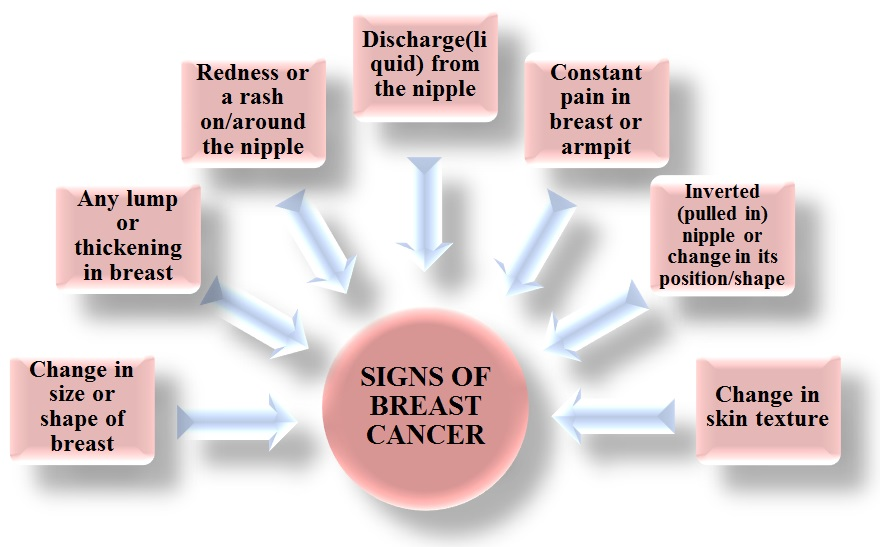

In [301]:
from IPython import display
display.Image("Signs.jpg")

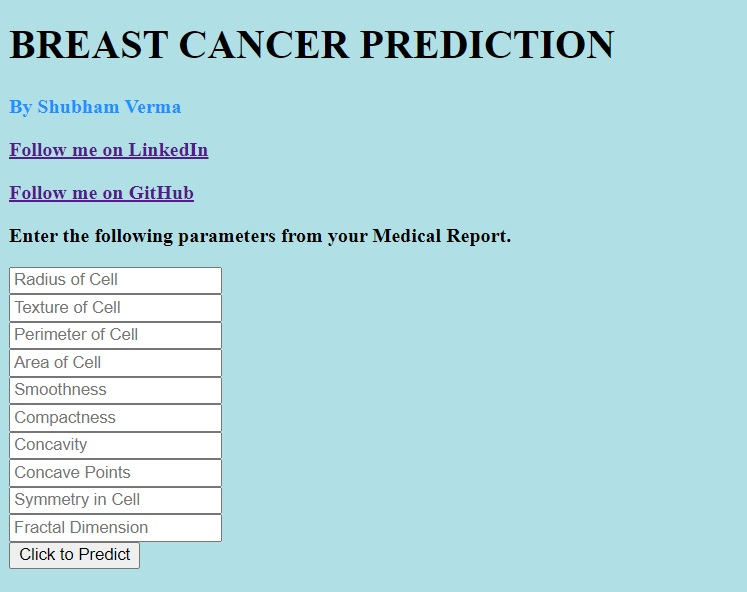

In [300]:
from IPython import display
display.Image("Homeapp.jpg")

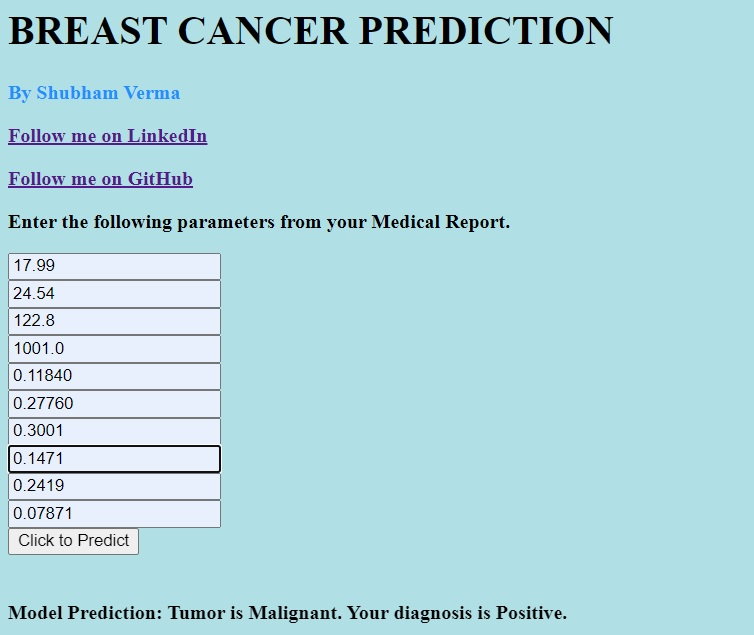

In [302]:
from IPython import display
display.Image("Positive Prediction.jpg")

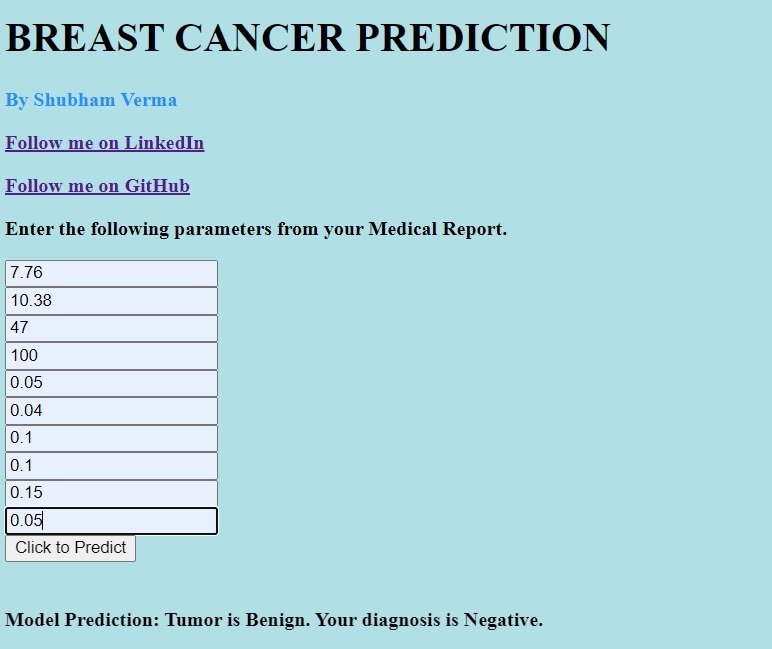

In [303]:
from IPython import display
display.Image("Negative Prediction.jpg")

## <span style='color:red '>1.0 Importing required libraries</span>

In [309]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

In [310]:
dataset=pd.read_csv('Breast Cancer Diagnostic.csv')
dataset.head()

ID number  radius  texture  perimeter    area  smoothness  compactness  \
0     842302   17.99    10.38     122.80  1001.0     0.11840      0.27760   
1     842517   20.57    17.77     132.90  1326.0     0.08474      0.07864   
2   84300903   19.69    21.25     130.00  1203.0     0.10960      0.15990   
3   84348301   11.42    20.38      77.58   386.1     0.14250      0.28390   
4   84358402   20.29    14.34     135.10  1297.0     0.10030      0.13280   

   concavity  concave points  symmetry  fractal dimension  Radius SE  \
0     0.3001         0.14710    0.2419            0.07871     1.0950   
1     0.0869         0.07017    0.1812            0.05667     0.5435   
2     0.1974         0.12790    0.2069            0.05999     0.7456   
3     0.2414         0.10520    0.2597            0.09744     0.4956   
4     0.1980         0.10430    0.1809            0.05883     0.7572   

   texture SE  perimeter SE  area SE  smoothness SE  compactness SE  \
0      0.9053         8.589   153.40       0.006399         0.04904   
1      0.7339         3.398    74.08       0.005225         0.01308   
2      0.7869         4.585    94.03       0.006150         0.04006   
3      1.1560         3.445    27.23       0.009110         0.07458   
4      0.7813         5.438    94.44       0.011490         0.02461   

   concavity SE  concave points SE  symmetry SE  fractal dimension SE  \
0       0.05373            0.01587      0.03003              0.006193   
1       0.01860            0.01340      0.01389              0.003532   
2       0.03832            0.02058      0.02250              0.004571   
3       0.05661            0.01867      0.05963              0.009208   
4       0.05688            0.01885      0.01756              0.005115   

   Worst Radius  Worst texture  Worst perimeter  Worst area  Worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   Worst fractal dimension Diagnosis  
0                  0.11890         M  
1                  0.08902         M  
2                  0.08758         M  
3                  0.17300         M  
4                  0.07678         M

In [311]:
### Dropping ID number column as it is of no significance
dataset.drop('ID number', axis=1, inplace=True)

In [312]:
### Checking a random record
dataset.iloc[568]

radius                         7.76
texture                       24.54
perimeter                     47.92
area                          181.0
smoothness                  0.05263
compactness                 0.04362
concavity                       0.0
concave points                  0.0
symmetry                     0.1587
fractal dimension           0.05884
Radius SE                    0.3857
texture SE                    1.428
perimeter SE                  2.548
area SE                       19.15
smoothness SE              0.007189
compactness SE              0.00466
concavity SE                    0.0
concave points SE               0.0
symmetry SE                 0.02676
fractal dimension SE       0.002783
Worst Radius                  9.456
Worst texture                 30.37
Worst perimeter               59.16
Worst area                    268.6
Worst smoothness            0.08996
Worst compactness           0.06444
Worst concavity                 0.0
Worst concave points        

In [313]:
### Getting stastical description of all features
dataset.describe().T

count        mean         std         min  \
radius                   569.0   14.127292    3.524049    6.981000   
texture                  569.0   19.289649    4.301036    9.710000   
perimeter                569.0   91.969033   24.298981   43.790000   
area                     569.0  654.889104  351.914129  143.500000   
smoothness               569.0    0.096360    0.014064    0.052630   
compactness              569.0    0.104341    0.052813    0.019380   
concavity                569.0    0.088799    0.079720    0.000000   
concave points           569.0    0.048919    0.038803    0.000000   
symmetry                 569.0    0.181162    0.027414    0.106000   
fractal dimension        569.0    0.062798    0.007060    0.049960   
Radius SE                569.0    0.405172    0.277313    0.111500   
texture SE               569.0    1.216853    0.551648    0.360200   
perimeter SE             569.0    2.866059    2.021855    0.757000   
area SE                  569.0   40.337079   45.491006    6.802000   
smoothness SE            569.0    0.007041    0.003003    0.001713   
compactness SE           569.0    0.025478    0.017908    0.002252   
concavity SE             569.0    0.031894    0.030186    0.000000   
concave points SE        569.0    0.011796    0.006170    0.000000   
symmetry SE              569.0    0.020542    0.008266    0.007882   
fractal dimension SE     569.0    0.003795    0.002646    0.000895   
Worst Radius             569.0   16.269190    4.833242    7.930000   
Worst texture            569.0   25.677223    6.146258   12.020000   
Worst perimeter          569.0  107.261213   33.602542   50.410000   
Worst area               569.0  880.583128  569.356993  185.200000   
Worst smoothness         569.0    0.132369    0.022832    0.071170   
Worst compactness        569.0    0.254265    0.157336    0.027290   
Worst concavity          569.0    0.272188    0.208624    0.000000   
Worst concave points     569.0    0.114606    0.065732    0.000000   
Worst symmetry           569.0    0.290076    0.061867    0.156500   
Worst fractal dimension  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius                    11.700000   13.370000    15.780000    28.11000  
texture                   16.170000   18.840000    21.800000    39.28000  
perimeter                 75.170000   86.240000   104.100000   188.50000  
area                     420.300000  551.100000   782.700000  2501.00000  
smoothness                 0.086370    0.095870     0.105300     0.16340  
compactness                0.064920    0.092630     0.130400     0.34540  
concavity                  0.029560    0.061540     0.130700     0.42680  
concave points             0.020310    0.033500     0.074000     0.20120  
symmetry                   0.161900    0.179200     0.195700     0.30400  
fractal dimension          0.057700    0.061540     0.066120     0.09744  
Radius SE                  0.232400    0.324200     0.478900     2.87300  
texture SE                 0.833900    1.108000     1.474000     4.88500  
perimeter SE               1.606000    2.287000     3.357000    21.98000  
area SE                   17.850000   24.530000    45.190000   542.20000  
smoothness SE              0.005169    0.006380     0.008146     0.03113  
compactness SE             0.013080    0.020450     0.032450     0.13540  
concavity SE               0.015090    0.025890     0.042050     0.39600  
concave points SE          0.007638    0.010930     0.014710     0.05279  
symmetry SE                0.015160    0.018730     0.023480     0.07895  
fractal dimension SE       0.002248    0.003187     0.004558     0.02984  
Worst Radius              13.010000   14.970000    18.790000    36.04000  
Worst texture             21.080000   25.410000    29.720000    49.54000  
Worst perimeter           84.110000   97.660000   125.400000   251.20000  
Worst area               515.300000  686.500000  1084.

In [314]:
### Getting datatypes of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius                   569 non-null    float64
 1   texture                  569 non-null    float64
 2   perimeter                569 non-null    float64
 3   area                     569 non-null    float64
 4   smoothness               569 non-null    float64
 5   compactness              569 non-null    float64
 6   concavity                569 non-null    float64
 7   concave points           569 non-null    float64
 8   symmetry                 569 non-null    float64
 9   fractal dimension        569 non-null    float64
 10  Radius SE                569 non-null    float64
 11  texture SE               569 non-null    float64
 12  perimeter SE             569 non-null    float64
 13  area SE                  569 non-null    float64
 14  smoothness SE            5

In [315]:
## Getting count of duplicates records in each feature
dataset[dataset.duplicated()].count()

radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave points             0
symmetry                   0
fractal dimension          0
Radius SE                  0
texture SE                 0
perimeter SE               0
area SE                    0
smoothness SE              0
compactness SE             0
concavity SE               0
concave points SE          0
symmetry SE                0
fractal dimension SE       0
Worst Radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smoothness           0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Diagnosis                  0
dtype: int64

In [316]:
## Getting count of null values in each feature

dataset.isnull().sum()

radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave points             0
symmetry                   0
fractal dimension          0
Radius SE                  0
texture SE                 0
perimeter SE               0
area SE                    0
smoothness SE              0
compactness SE             0
concavity SE               0
concave points SE          0
symmetry SE                0
fractal dimension SE       0
Worst Radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smoothness           0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Diagnosis                  0
dtype: int64

In [317]:
### Getting count of unique values in each feature
dataset.nunique()

radius                     456
texture                    479
perimeter                  522
area                       539
smoothness                 474
compactness                537
concavity                  537
concave points             542
symmetry                   432
fractal dimension          499
Radius SE                  540
texture SE                 519
perimeter SE               533
area SE                    528
smoothness SE              547
compactness SE             541
concavity SE               533
concave points SE          507
symmetry SE                498
fractal dimension SE       545
Worst Radius               457
Worst texture              511
Worst perimeter            514
Worst area                 544
Worst smoothness           411
Worst compactness          529
Worst concavity            539
Worst concave points       492
Worst symmetry             500
Worst fractal dimension    535
Diagnosis                    2
dtype: int64

## <span style='color:red '>3.0 Analysis of Features</span>

### <span style='color:red '>3.1 Diagnosis</span>

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

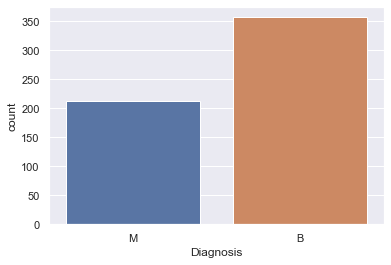

In [318]:
sns.countplot(data=dataset, x='Diagnosis')

### <span style='color:red '>3.2 Numerical  features</span>

In [319]:
### Numerical features 
numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(numerical_feature)

['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension', 'Radius SE', 'texture SE', 'perimeter SE', 'area SE', 'smoothness SE', 'compactness SE', 'concavity SE', 'concave points SE', 'symmetry SE', 'fractal dimension SE', 'Worst Radius', 'Worst texture', 'Worst perimeter', 'Worst area', 'Worst smoothness', 'Worst compactness', 'Worst concavity', 'Worst concave points', 'Worst symmetry', 'Worst fractal dimension']


In [320]:
### Getting magnitude of variation in features feature
dataset[numerical_feature].max()-dataset[numerical_feature].min()

radius                       21.129000
texture                      29.570000
perimeter                   144.710000
area                       2357.500000
smoothness                    0.110770
compactness                   0.326020
concavity                     0.426800
concave points                0.201200
symmetry                      0.198000
fractal dimension             0.047480
Radius SE                     2.761500
texture SE                    4.524800
perimeter SE                 21.223000
area SE                     535.398000
smoothness SE                 0.029417
compactness SE                0.133148
concavity SE                  0.396000
concave points SE             0.052790
symmetry SE                   0.071068
fractal dimension SE          0.028945
Worst Radius                 28.110000
Worst texture                37.520000
Worst perimeter             200.790000
Worst area                 4068.800000
Worst smoothness              0.151430
Worst compactness        

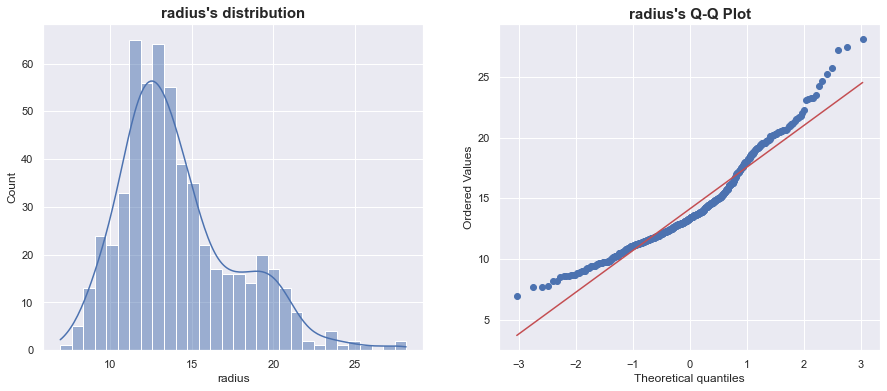

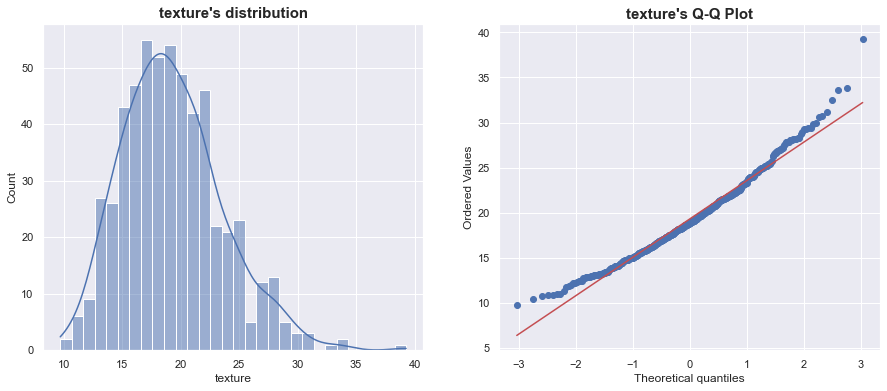

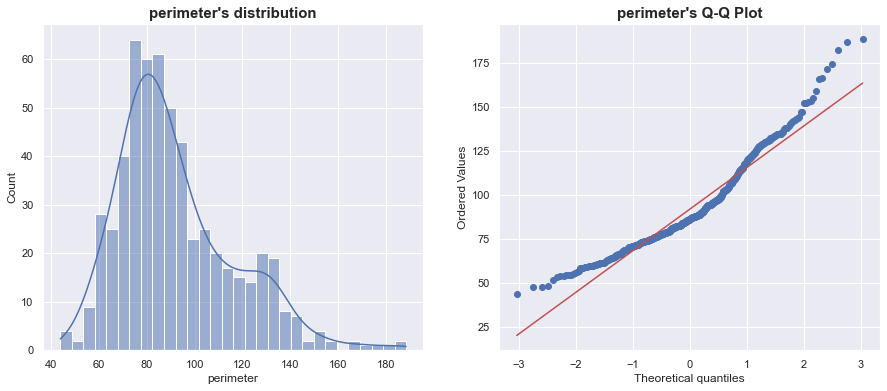

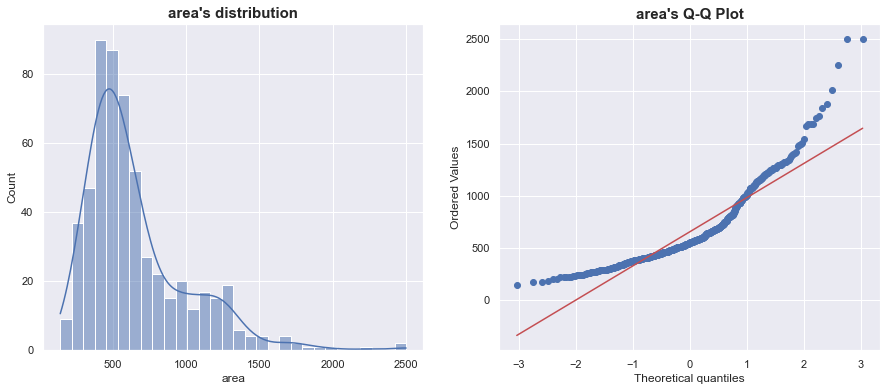

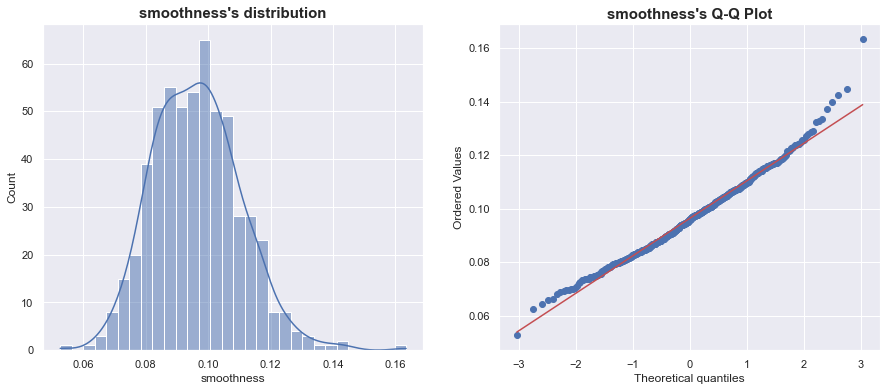

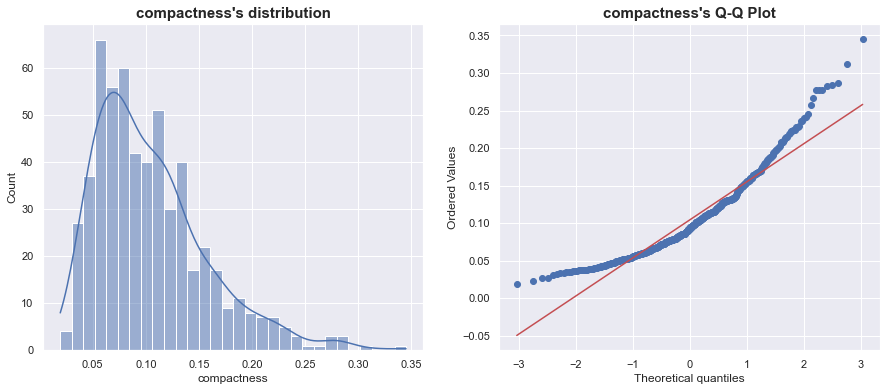

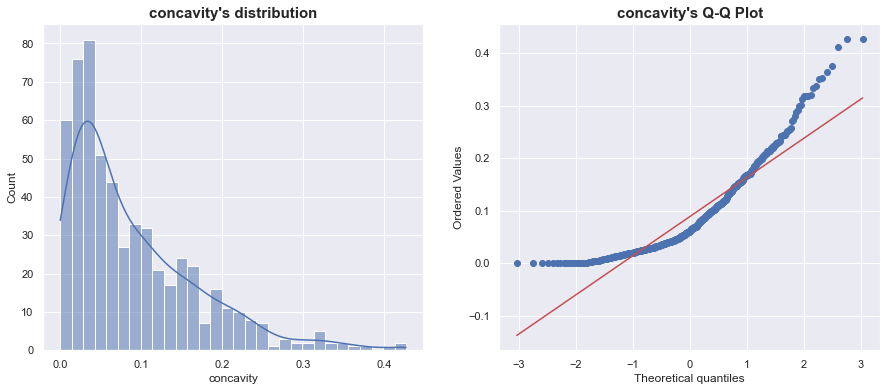

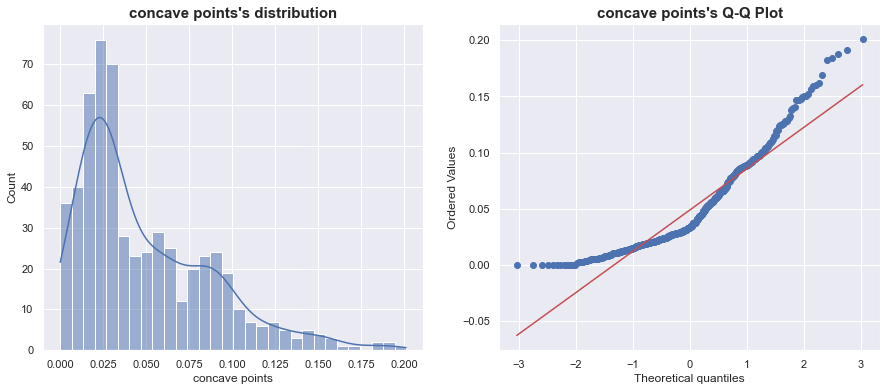

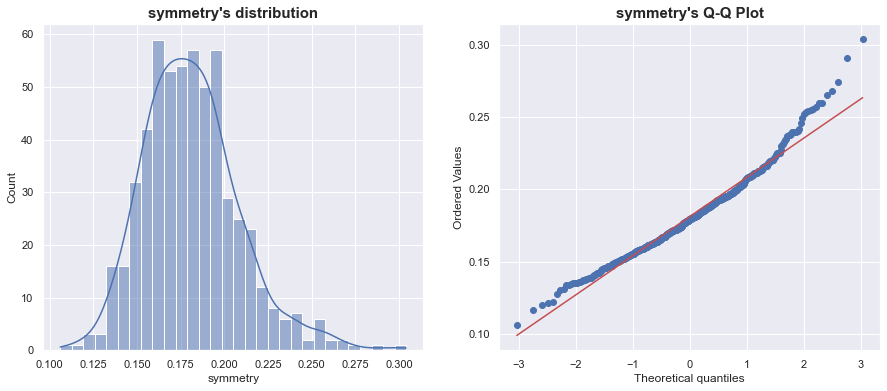

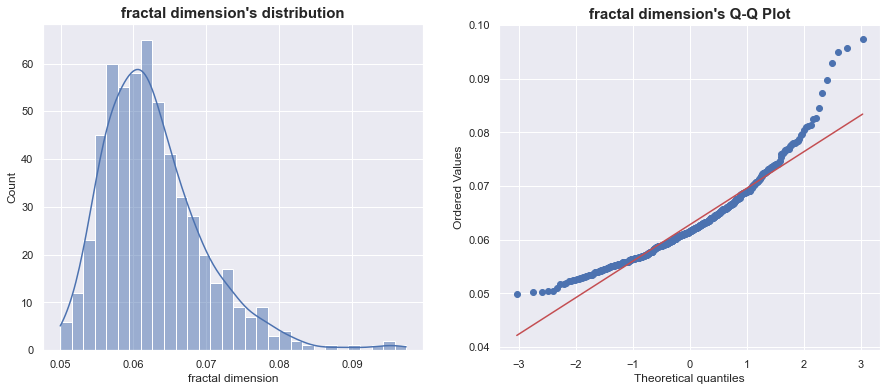

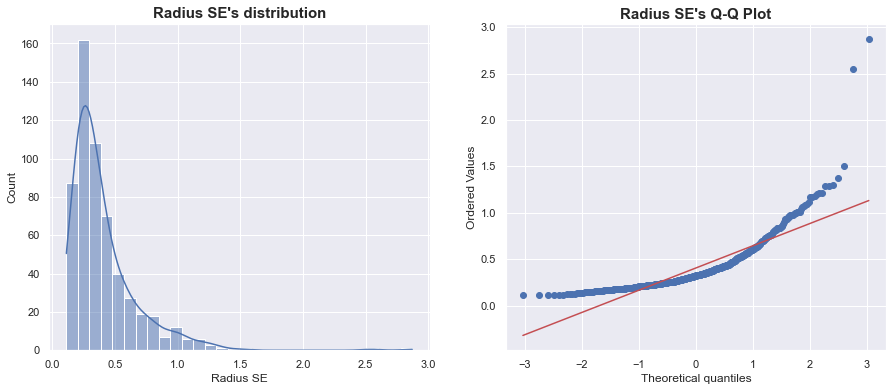

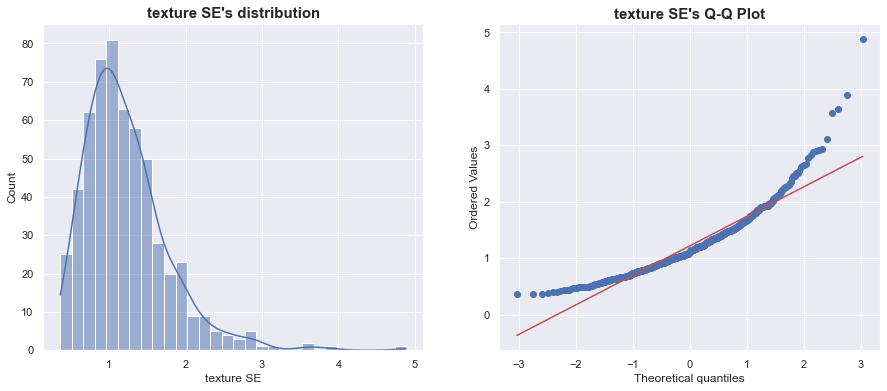

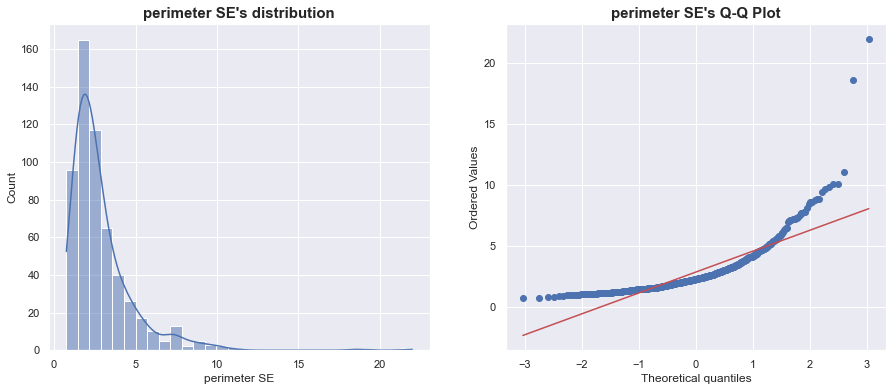

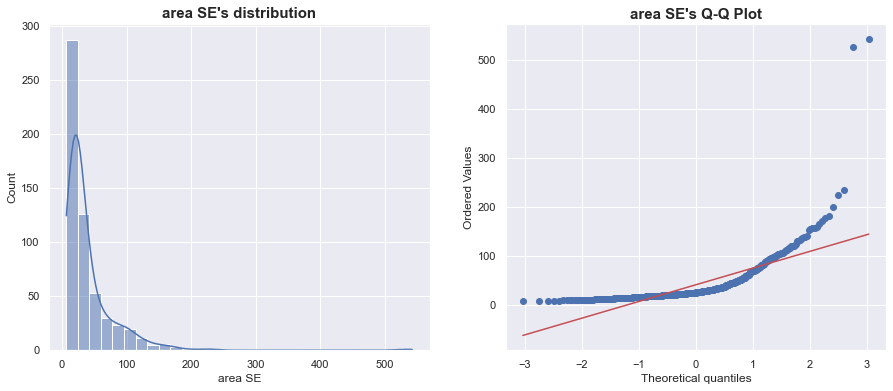

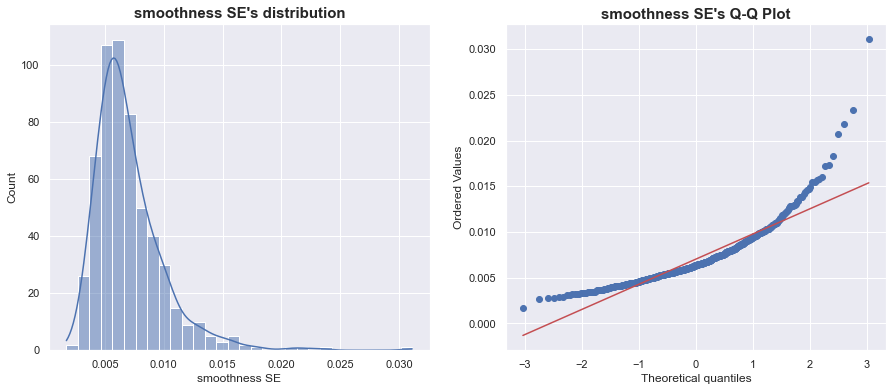

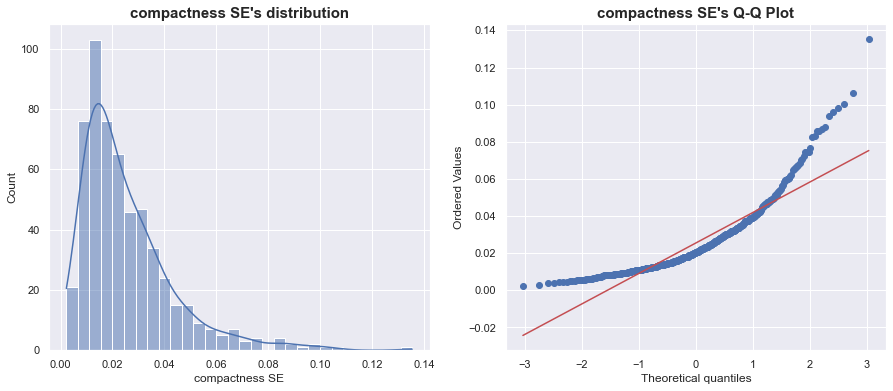

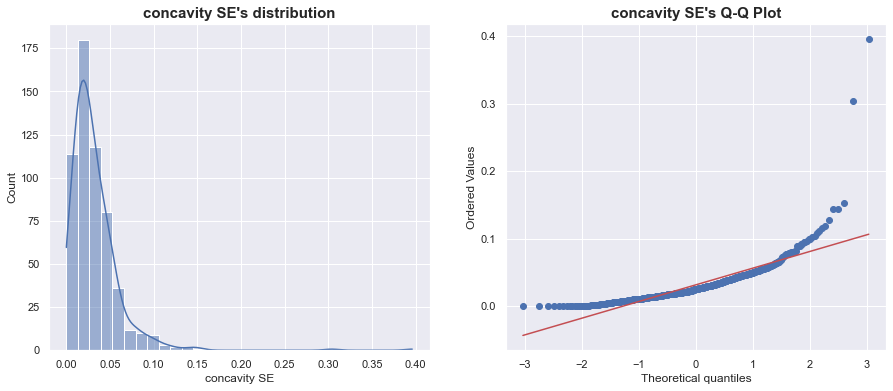

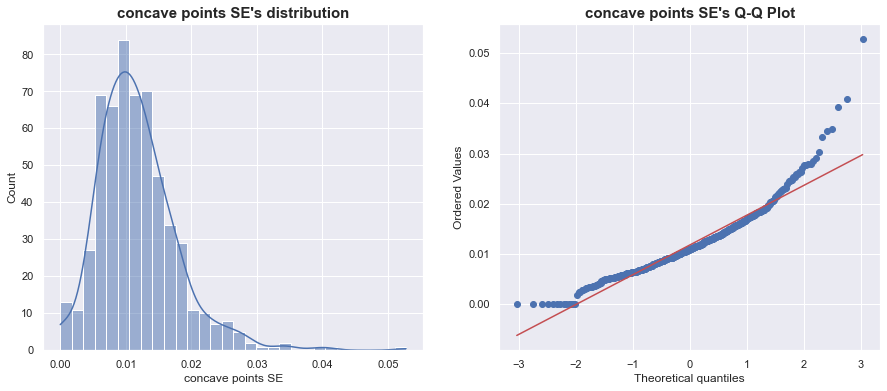

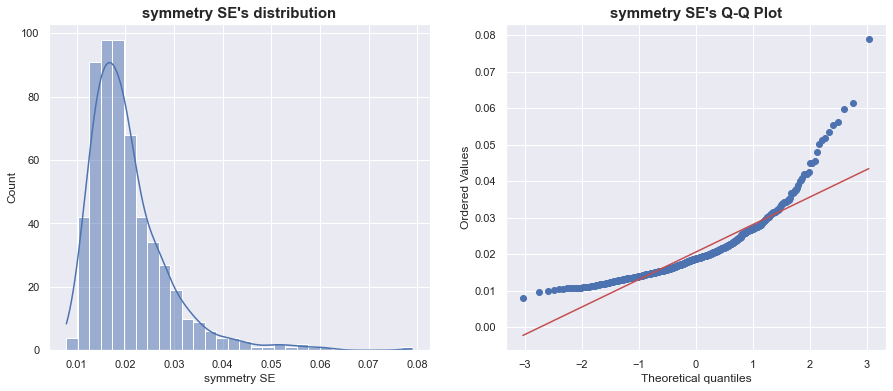

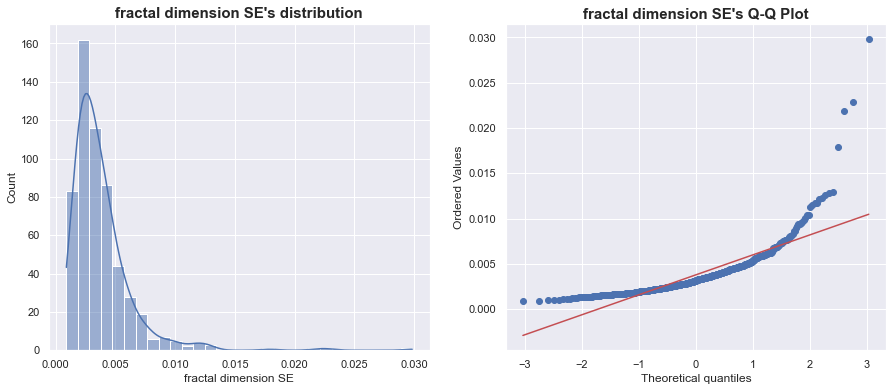

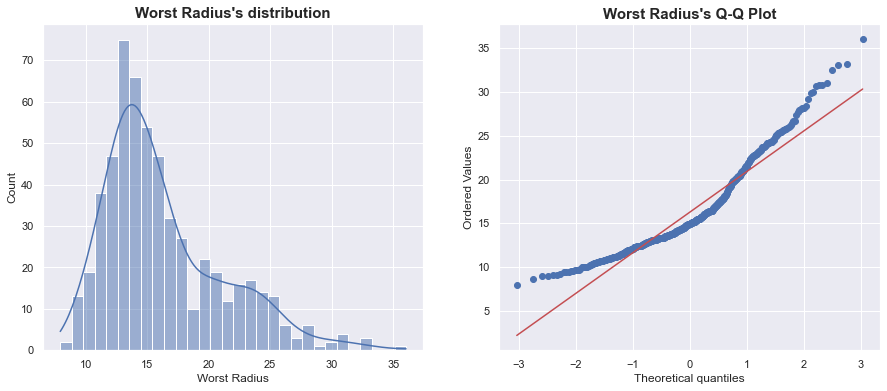

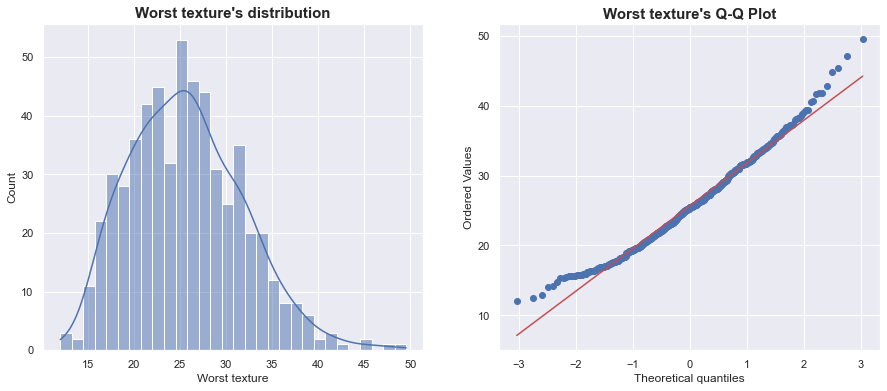

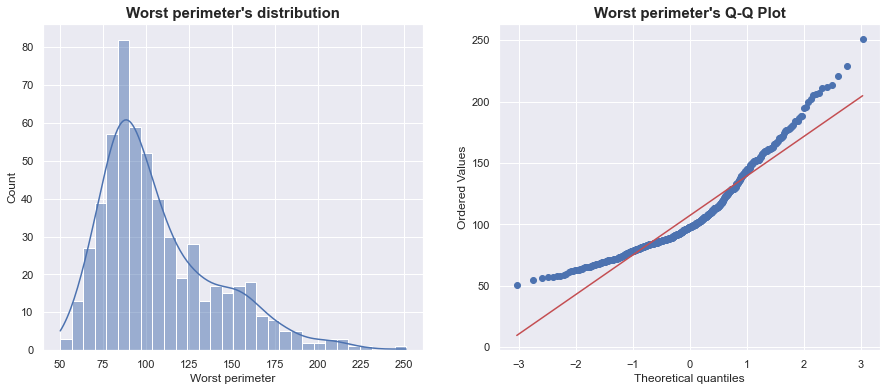

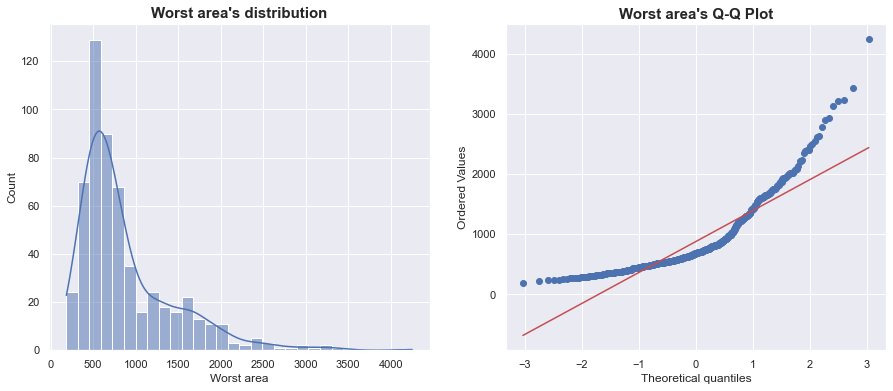

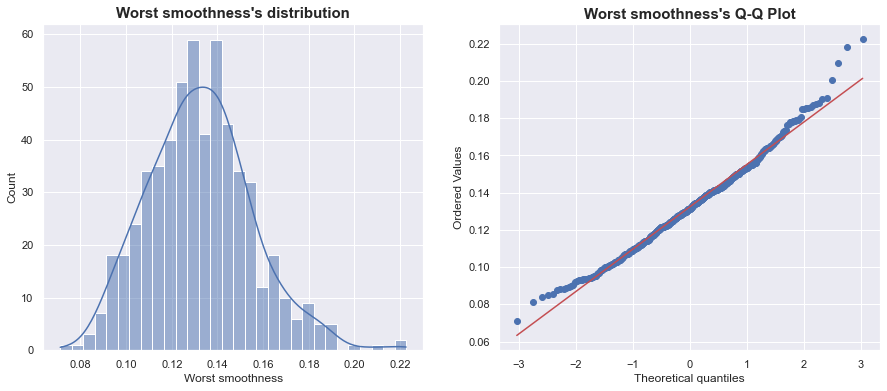

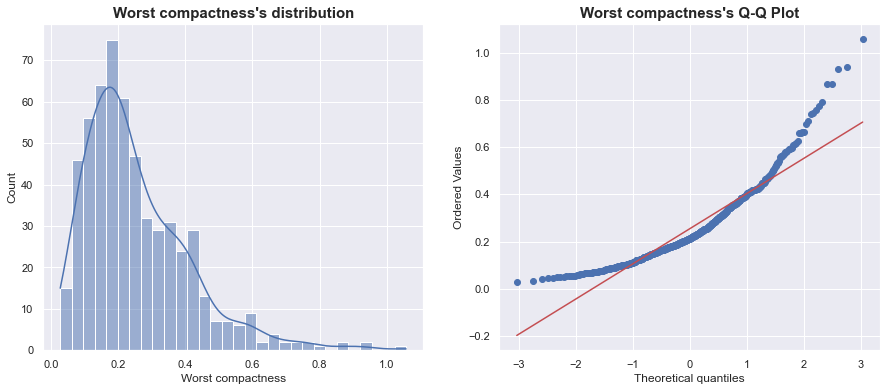

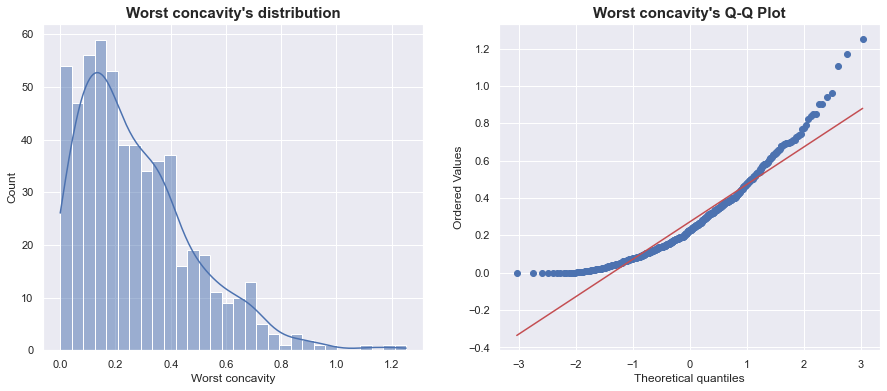

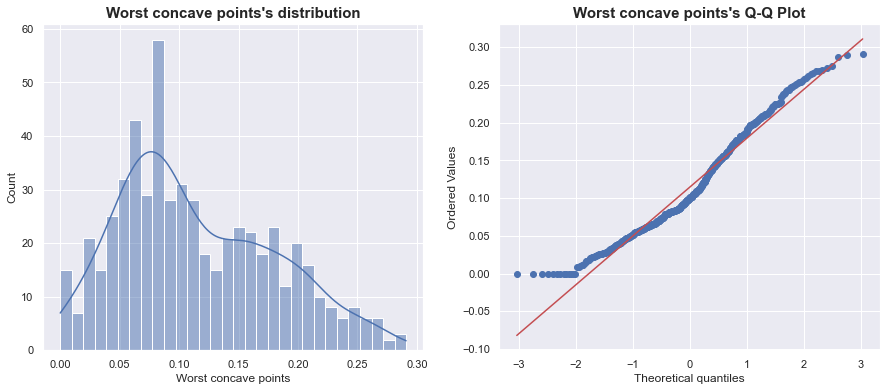

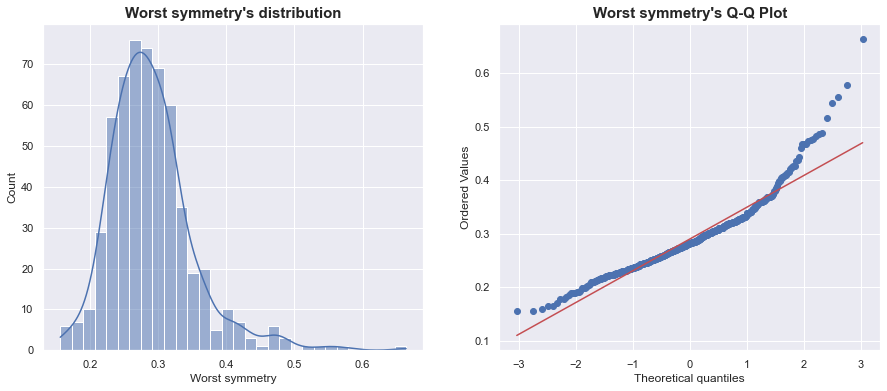

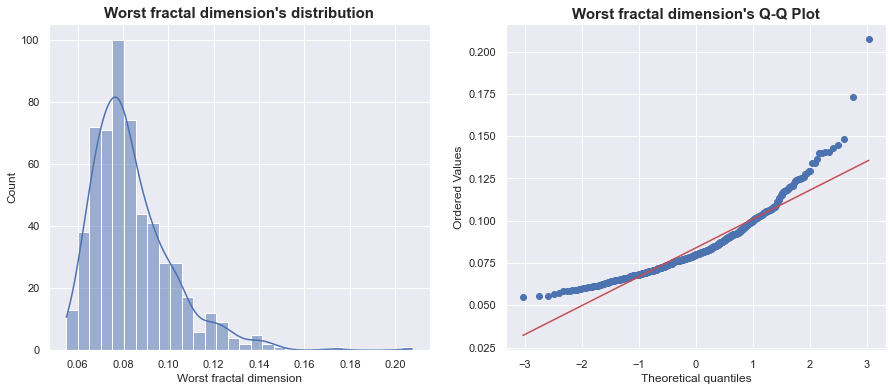

In [321]:
### Checking distribution of Continuous numerical features

for feature in numerical_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=feature, kde=True, bins=30)
    plt.title("{}'s distribution".format(feature),fontweight="bold", fontsize=15)
    
    plt.subplot(122)
    stats.probplot(dataset[feature], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(feature),fontweight="bold", fontsize=15)
    plt.show();

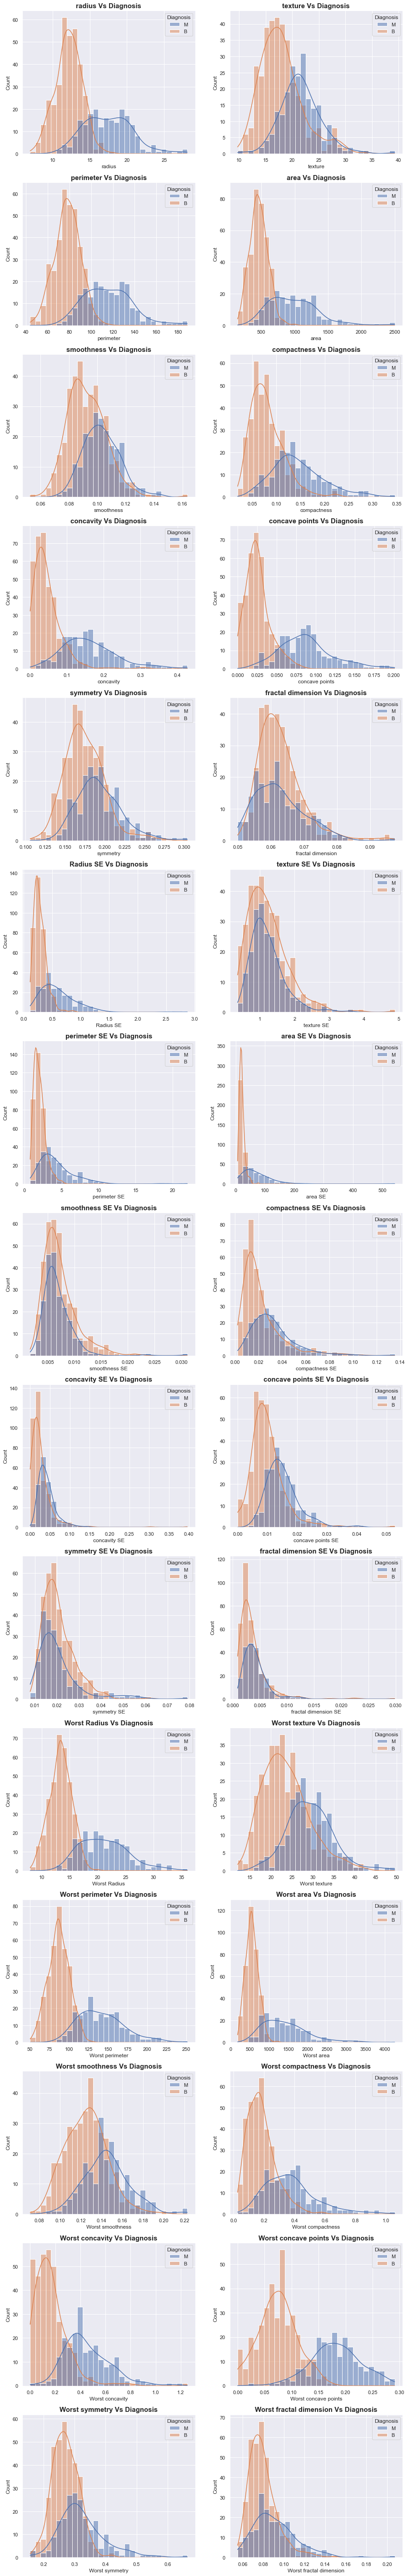

In [322]:
### Comparing Continuous numerical features with Classes

plt.figure(figsize=(15,110))
for feature in enumerate(numerical_feature):
    plt.subplot(16, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.histplot(data=dataset, x=feature[1], kde=True, bins=30, color='blue', hue='Diagnosis')
    plt.title("{} Vs Diagnosis".format(feature[1]),fontweight="bold", fontsize=15)

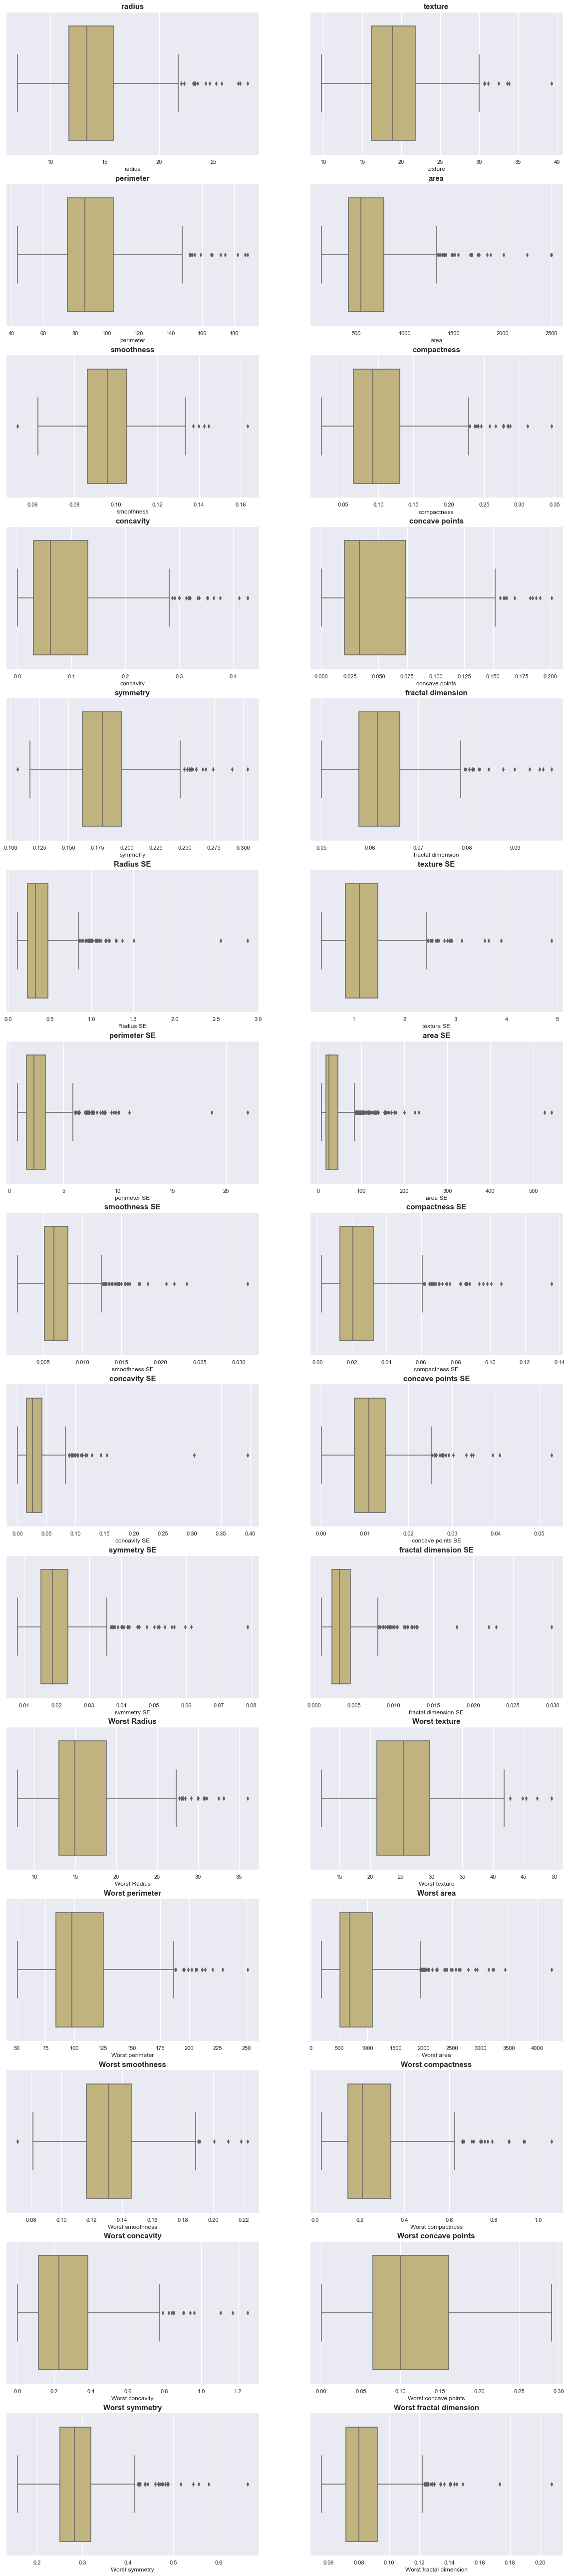

In [323]:
### Checking outliers in numerical features

plt.figure(figsize=(20,100))
for feature in enumerate(numerical_feature):
    plt.subplot(16, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='y')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

In [324]:
data1= dataset.copy()

In [325]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [326]:
### Capping outliers from continuous features
for feature in numerical_feature:
    data1=remove_outliers(data1, feature)

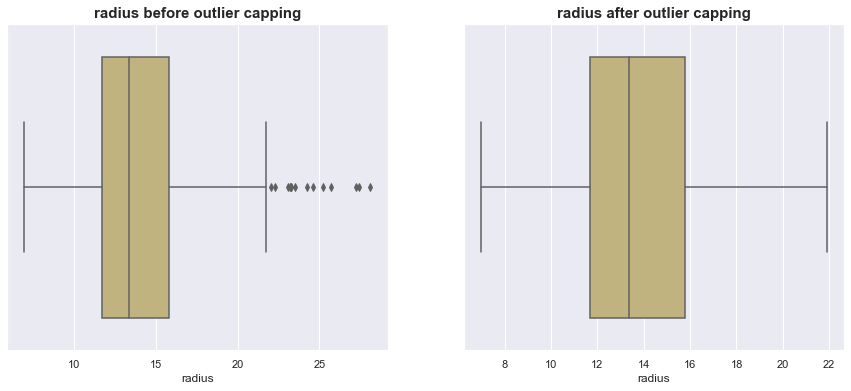

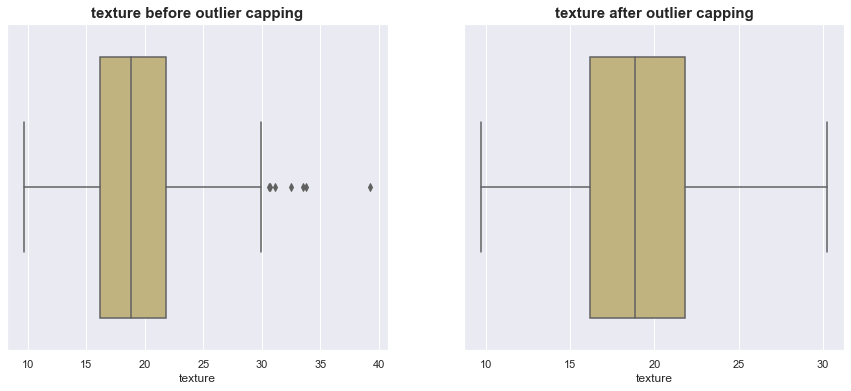

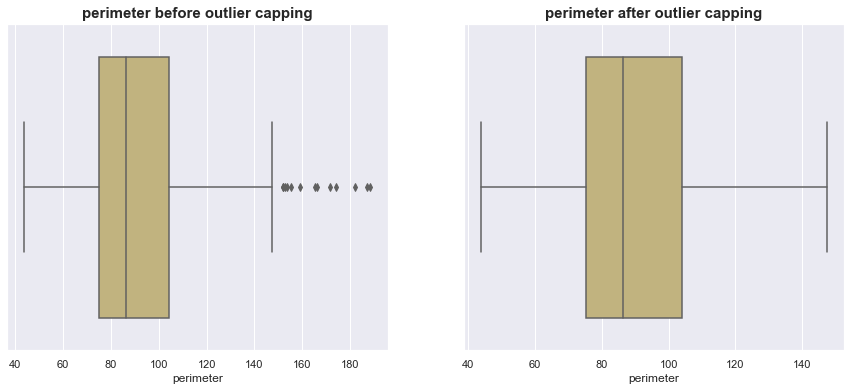

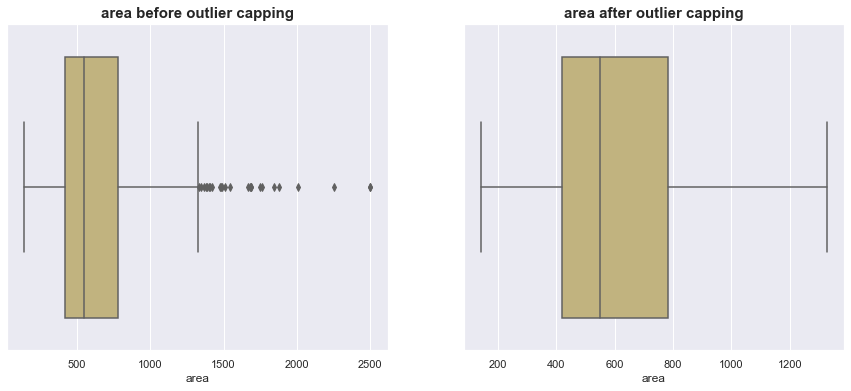

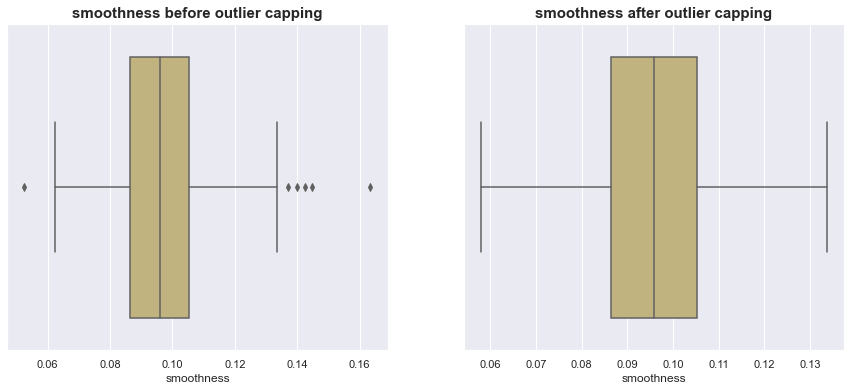

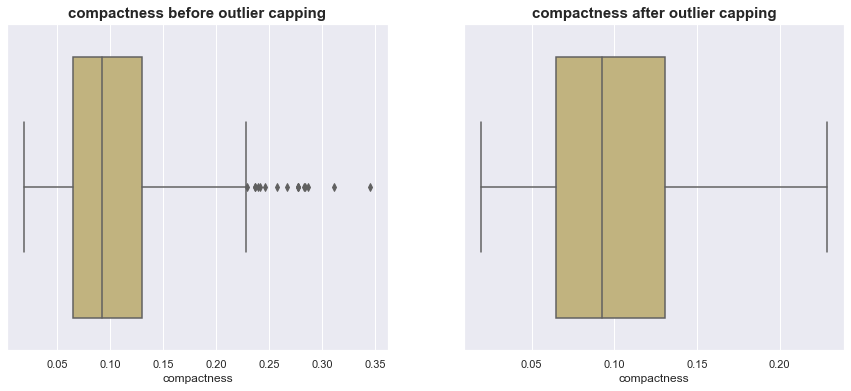

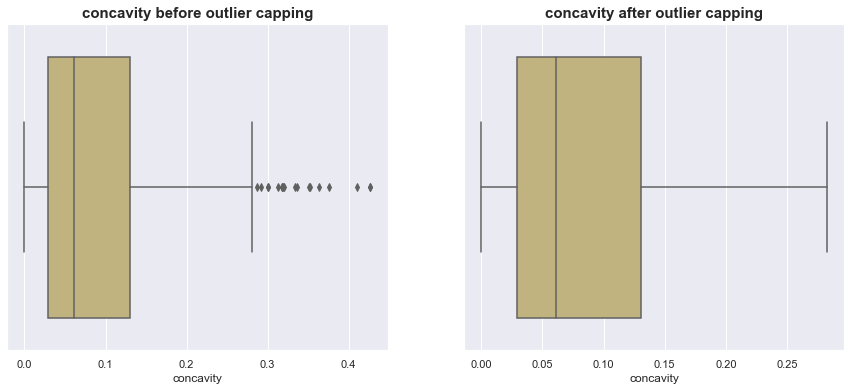

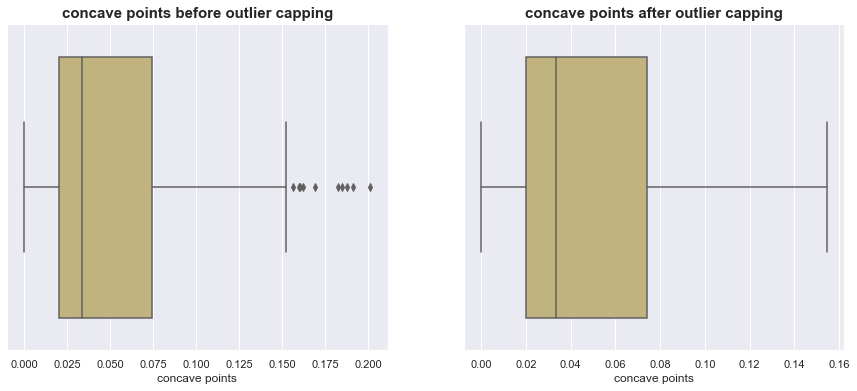

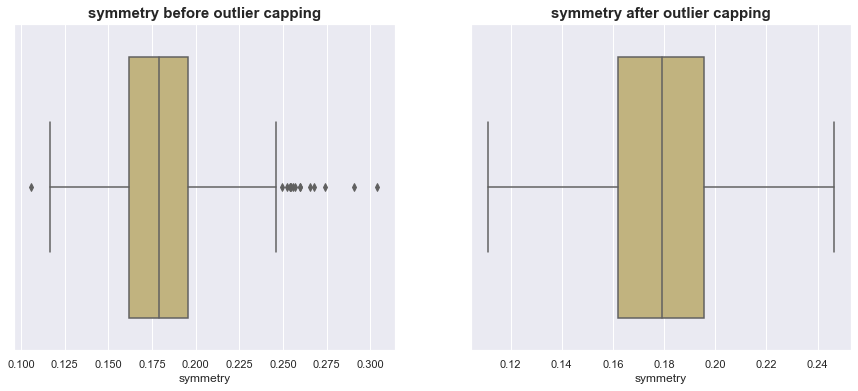

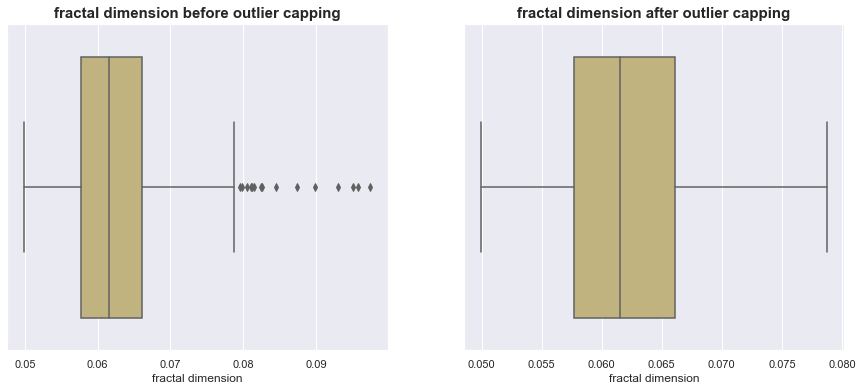

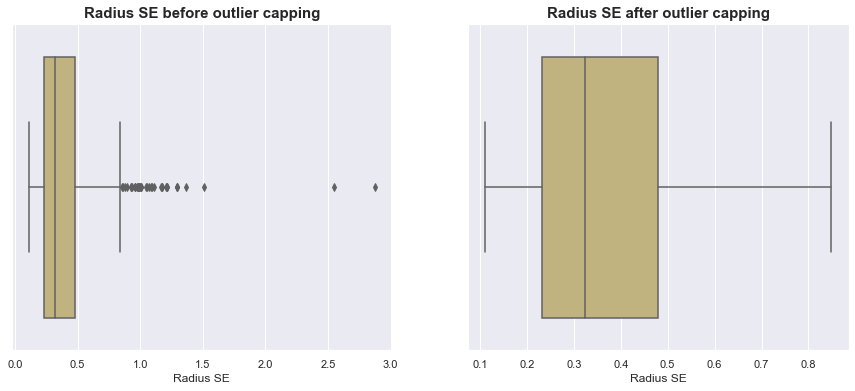

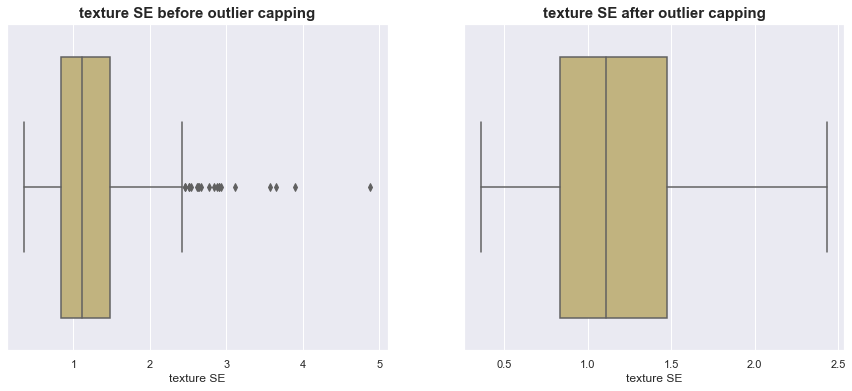

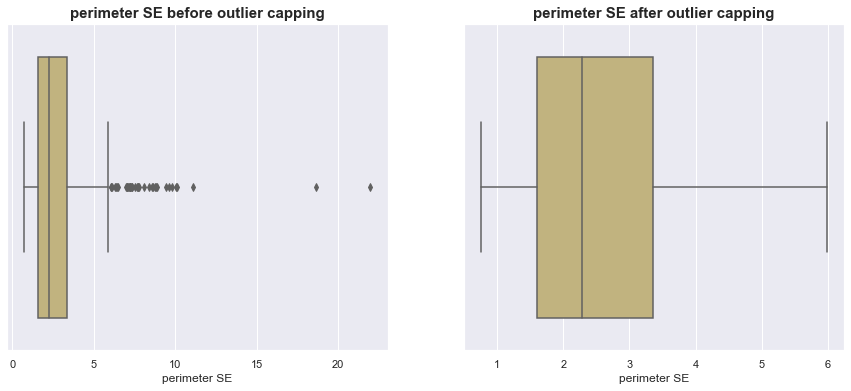

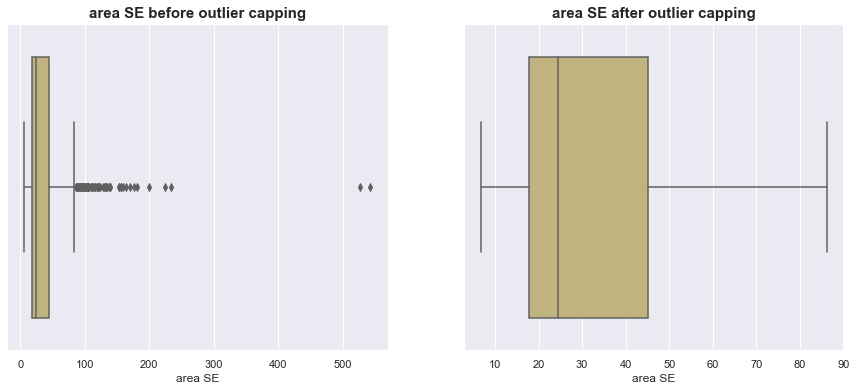

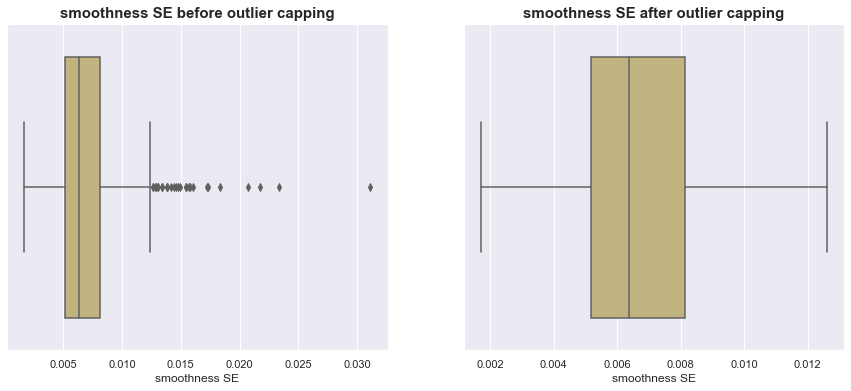

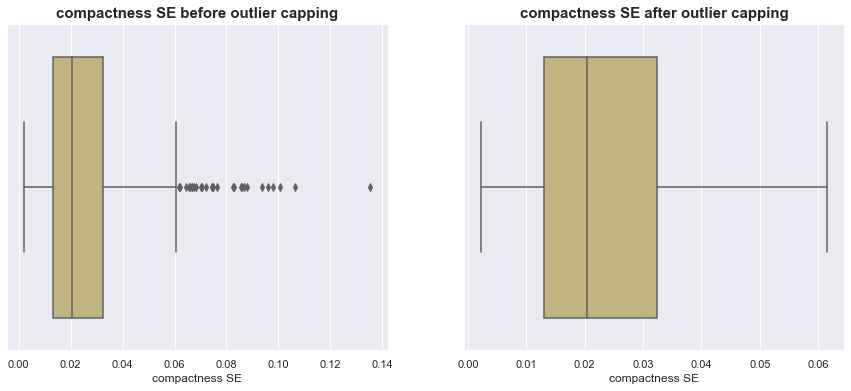

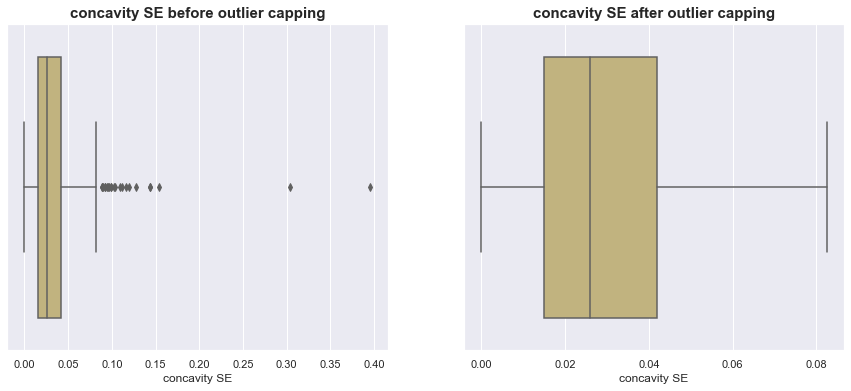

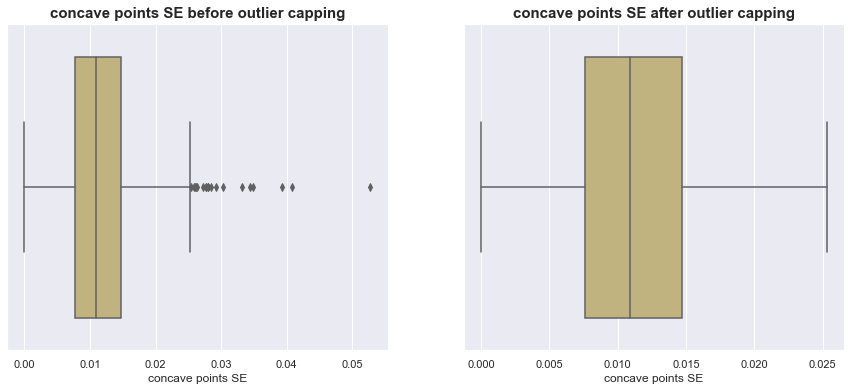

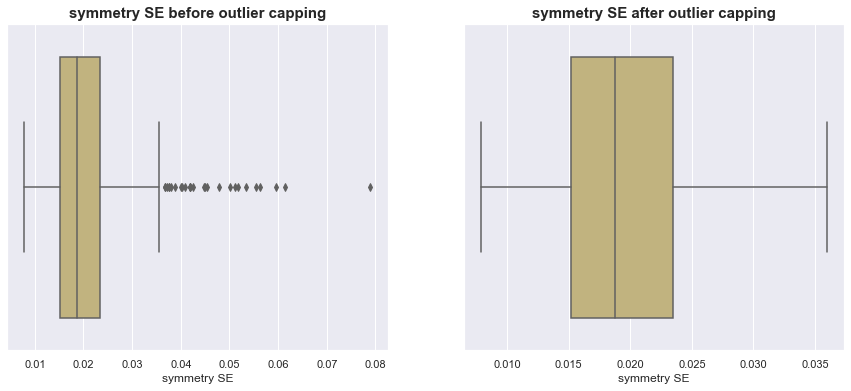

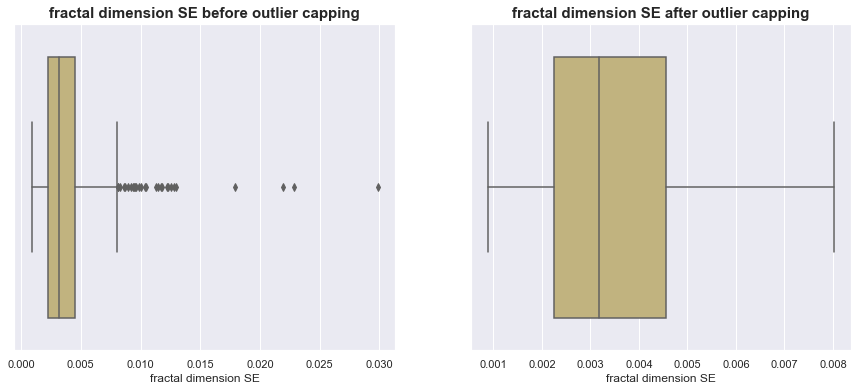

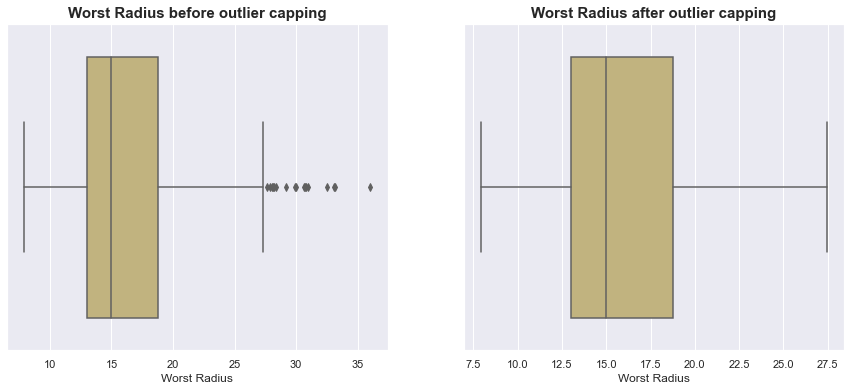

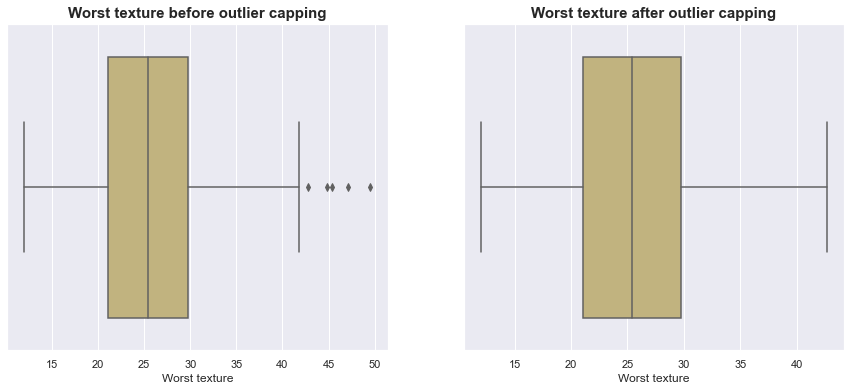

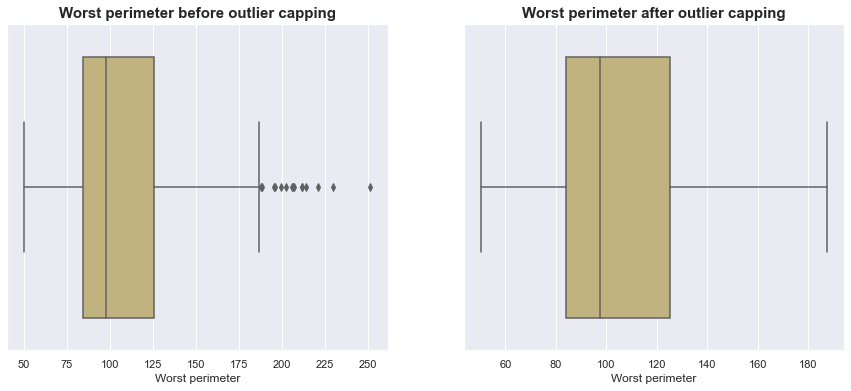

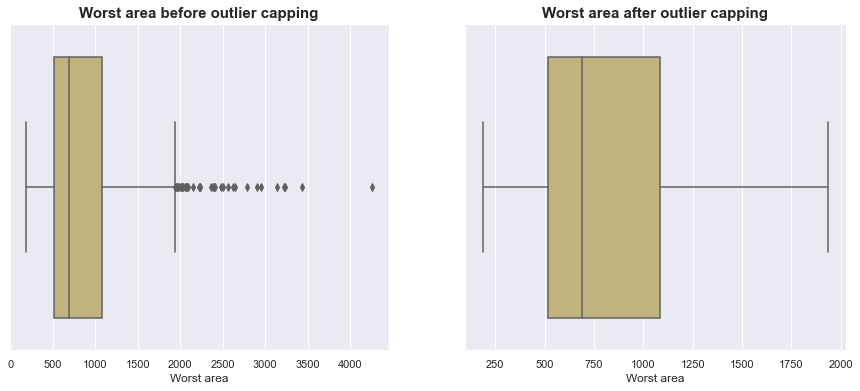

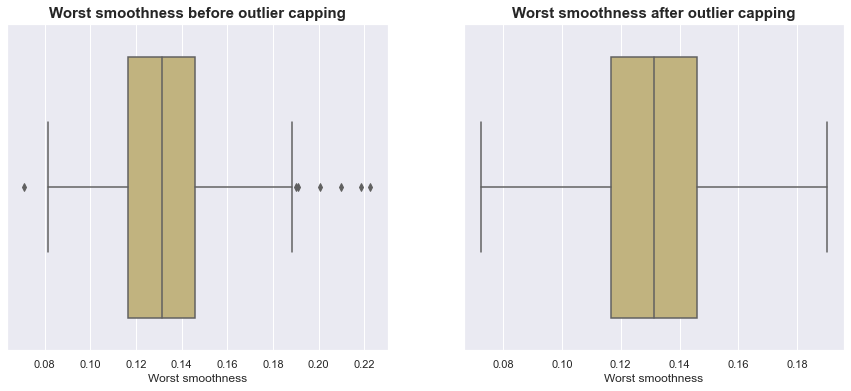

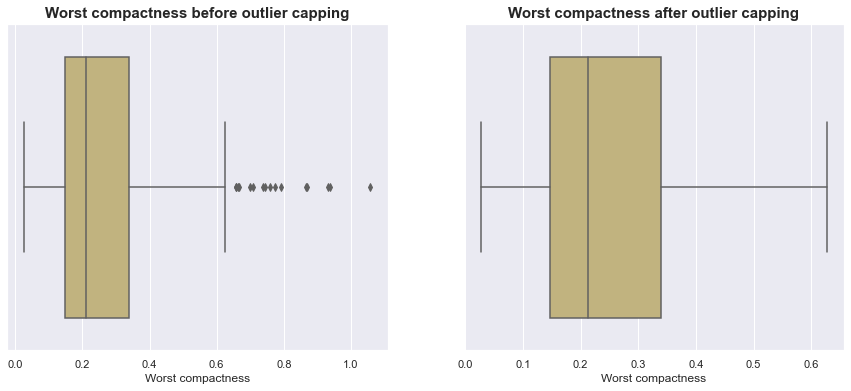

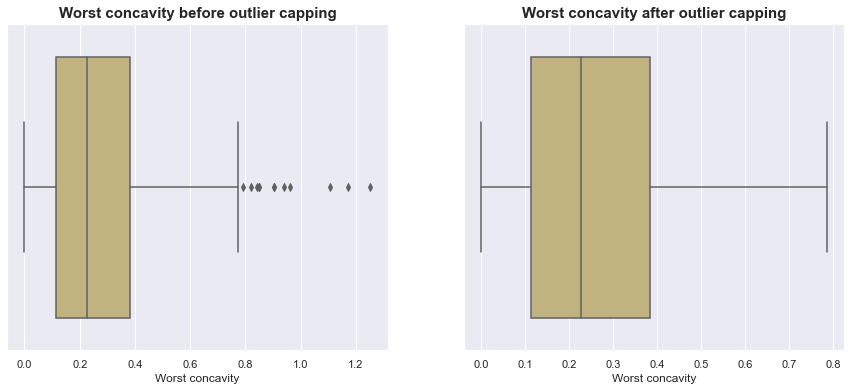

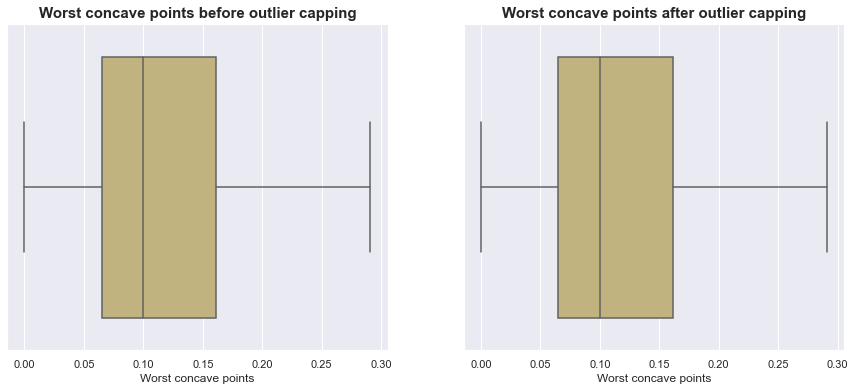

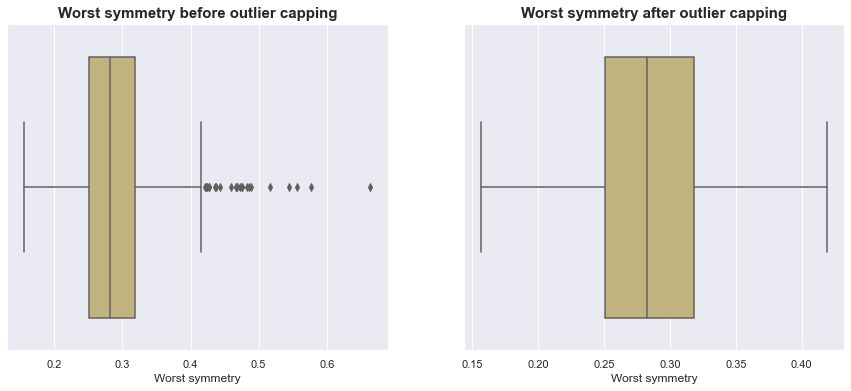

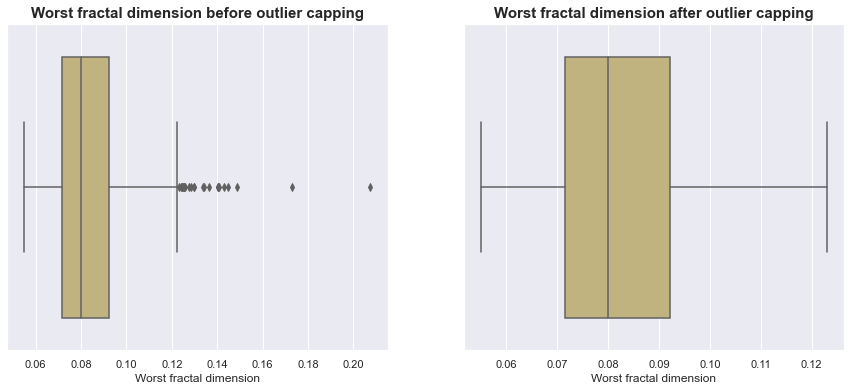

In [327]:
### Checking distribution of Continuous numerical features

for feature in numerical_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.boxplot(data=dataset, x=feature, color='y')
    plt.title("{} before outlier capping".format(feature), fontweight="bold", fontsize=15)
        
    plt.subplot(122)
    sns.boxplot(data=data1, x=feature, color='y')
    plt.title("{} after outlier capping".format(feature), fontweight="bold", fontsize=15)
    plt.show();

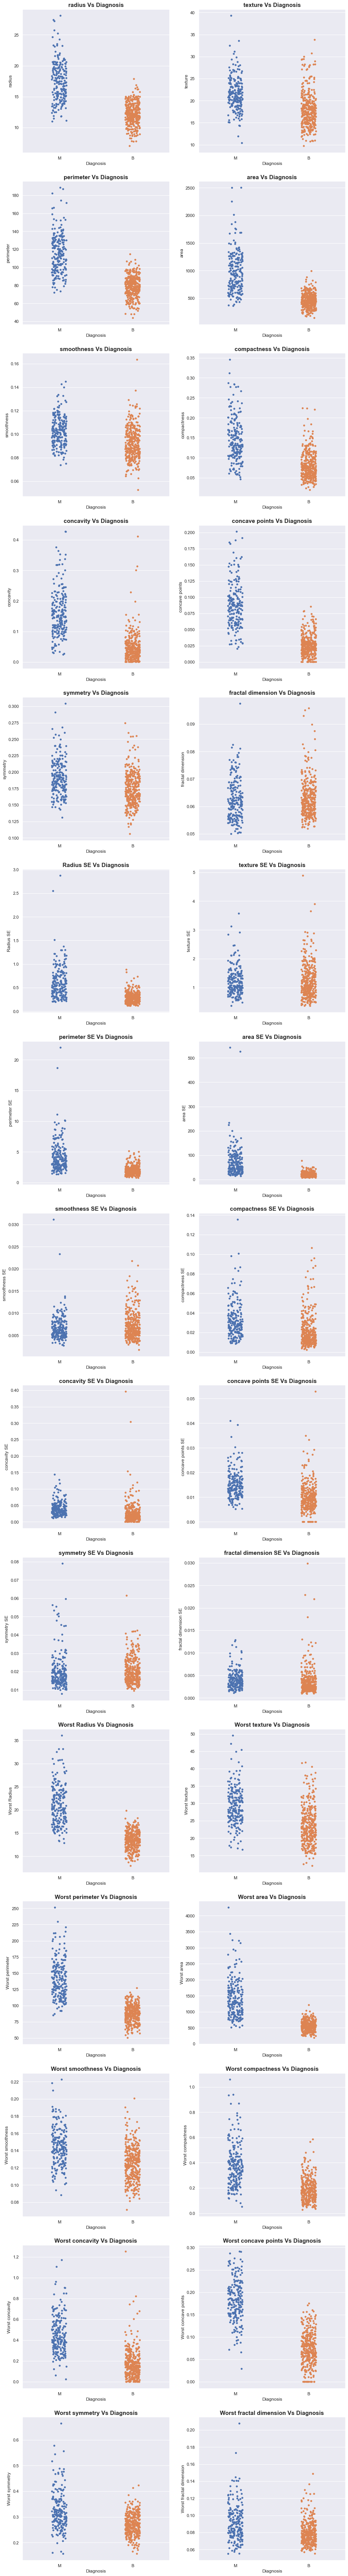

In [19]:
plt.figure(figsize=(15,130))
for feature in enumerate(numerical_feature):
    plt.subplot(16, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(7,8)})
    sns.stripplot(data=dataset, y=feature[1], x='Diagnosis')
    plt.title("{} Vs Diagnosis".format(feature[1]), fontweight="bold", fontsize=15)

In [93]:
data=dataset.copy()

Text(0.5, 1.0, 'Target Feature class count')

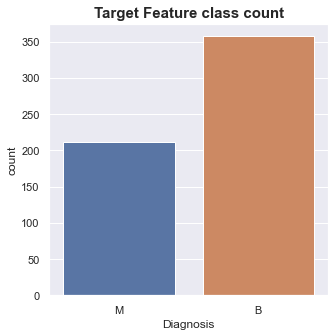

In [94]:
sns.countplot(data=data, x='Diagnosis')
sns.set(rc={'figure.figsize':(5,5)})
plt.title("Target Feature class count", fontweight="bold", fontsize=15)

In [95]:
data['Diagnosis']=data['Diagnosis'].replace('B','0')
data['Diagnosis']=data['Diagnosis'].replace('M','1')
data['Diagnosis']=data.Diagnosis.astype('int64')

In [96]:
from imblearn.combine import SMOTETomek

In [97]:
smk=SMOTETomek()
smk

SMOTETomek()

In [98]:
X=data.drop("Diagnosis", axis=1)
X.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  Radius SE  texture SE  \
0         0.14710    0.2419            0.07871     1.0950      0.9053   
1         0.07017    0.1812            0.05667     0.5435      0.7339   
2         0.12790    0.2069            0.05999     0.7456      0.7869   
3         0.10520    0.2597            0.09744     0.4956      1.1560   
4         0.10430    0.1809            0.05883     0.7572      0.7813   

   perimeter SE  area SE  smoothness SE  compactness SE  concavity SE  \
0         8.589   153.40       0.006399         0.04904       0.05373   
1         3.398    74.08       0.005225         0.01308       0.01860   
2         4.585    94.03       0.006150         0.04006       0.03832   
3         3.445    27.23       0.009110         0.07458       0.05661   
4         5.438    94.44       0.011490         0.02461       0.05688   

   concave points SE  symmetry SE  fractal dimension SE  Worst Radius  \
0            0.01587      0.03003              0.006193         25.38   
1            0.01340      0.01389              0.003532         24.99   
2            0.02058      0.02250              0.004571         23.57   
3            0.01867      0.05963              0.009208         14.91   
4            0.01885      0.01756              0.005115         22.54   

   Worst texture  Worst perimeter  Worst area  Worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   Worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [99]:
y=data['Diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [100]:
X_bal,y_bal=smk.fit_resample(X,y)

In [101]:
X_bal.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  Radius SE  texture SE  \
0         0.14710    0.2419            0.07871     1.0950      0.9053   
1         0.07017    0.1812            0.05667     0.5435      0.7339   
2         0.12790    0.2069            0.05999     0.7456      0.7869   
3         0.10520    0.2597            0.09744     0.4956      1.1560   
4         0.10430    0.1809            0.05883     0.7572      0.7813   

   perimeter SE  area SE  smoothness SE  compactness SE  concavity SE  \
0         8.589   153.40       0.006399         0.04904       0.05373   
1         3.398    74.08       0.005225         0.01308       0.01860   
2         4.585    94.03       0.006150         0.04006       0.03832   
3         3.445    27.23       0.009110         0.07458       0.05661   
4         5.438    94.44       0.011490         0.02461       0.05688   

   concave points SE  symmetry SE  fractal dimension SE  Worst Radius  \
0            0.01587      0.03003              0.006193         25.38   
1            0.01340      0.01389              0.003532         24.99   
2            0.02058      0.02250              0.004571         23.57   
3            0.01867      0.05963              0.009208         14.91   
4            0.01885      0.01756              0.005115         22.54   

   Worst texture  Worst perimeter  Worst area  Worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   Worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [102]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_bal)))

In [103]:
X_bal['Diagnosis']=y_bal

In [105]:
X_bal['Diagnosis'].value_counts()

1    348
0    348
Name: Diagnosis, dtype: int64

In [106]:
data=X_bal

In [107]:
corr= round(data.corr(),2)
corr

radius  texture  perimeter  area  smoothness  \
radius                     1.00     0.35       1.00  0.99        0.19   
texture                    0.35     1.00       0.35  0.34        0.00   
perimeter                  1.00     0.35       1.00  0.99        0.23   
area                       0.99     0.34       0.99  1.00        0.19   
smoothness                 0.19     0.00       0.23  0.19        1.00   
compactness                0.54     0.26       0.58  0.52        0.66   
concavity                  0.72     0.33       0.76  0.72        0.53   
concave points             0.85     0.32       0.88  0.85        0.55   
symmetry                   0.18     0.08       0.21  0.17        0.56   
fractal dimension         -0.33    -0.09      -0.28 -0.30        0.57   
Radius SE                  0.72     0.30       0.73  0.77        0.30   
texture SE                -0.10     0.37      -0.09 -0.07        0.05   
perimeter SE               0.71     0.30       0.73  0.76        0.29   
area SE                    0.76     0.29       0.77  0.82        0.24   
smoothness SE             -0.22    -0.00      -0.20 -0.17        0.30   
compactness SE             0.21     0.21       0.26  0.21        0.32   
concavity SE               0.22     0.16       0.25  0.23        0.25   
concave points SE          0.39     0.19       0.42  0.38        0.38   
symmetry SE               -0.10    -0.02      -0.08 -0.08        0.16   
fractal dimension SE      -0.04     0.06      -0.01 -0.02        0.29   
Worst Radius               0.97     0.38       0.97  0.97        0.23   
Worst texture              0.31     0.92       0.32  0.29        0.06   
Worst perimeter            0.97     0.38       0.97  0.96        0.25   
Worst area                 0.94     0.36       0.94  0.96        0.22   
Worst smoothness           0.13     0.12       0.16  0.12        0.79   
Worst compactness          0.42     0.30       0.45  0.39        0.48   
Worst concavity            0.55     0.33       0.59  0.53        0.45   
Worst concave points       0.77     0.33       0.79  0.74        0.51   
Worst symmetry             0.17     0.11       0.19  0.14        0.39   
Worst fractal dimension    0.00     0.13       0.04 -0.01        0.50   
Diagnosis                  0.73     0.43       0.74  0.69        0.37   

                         compactness  concavity  concave points  symmetry  \
radius                          0.54       0.72            0.85      0.18   
texture                         0.26       0.33            0.32      0.08   
perimeter                       0.58       0.76            0.88      0.21   
area                            0.52       0.72            0.85      0.17   
smoothness                      0.66       0.53            0.55      0.56   
compactness                     1.00       0.89            0.83      0.62   
concavity                       0.89       1.00            0.93      0.51   
concave points                  0.83       0.93            1.00      0.46   
symmetry                        0.62       0.51            0.46      1.00   
fractal dimension               0.52       0.27            0.10      0.47   
Radius SE                       0.50       0.65            0.72      0.31   
texture SE                      0.01       0.04           -0.01      0.10   
perimeter SE                    0.55       0.68            0.73      0.32   
area SE                         0.46       0.64            0.71      0.23   
smoothness SE                   0.10       0.06           -0.02      0.14   
compactness SE                  0.72       0.64            0.46      0.43   
concavity SE                    0.56       0.67            0.43      0.34   
concave points SE               0.62       0.66            0.59      0.39   
symmetry SE                     0.20       0.13            0.05      0.43   
fractal dimension SE            0.49       0.41            0.22      0.33   
Worst Radius                    0.56       0.73            0.86      0.

<AxesSubplot:>

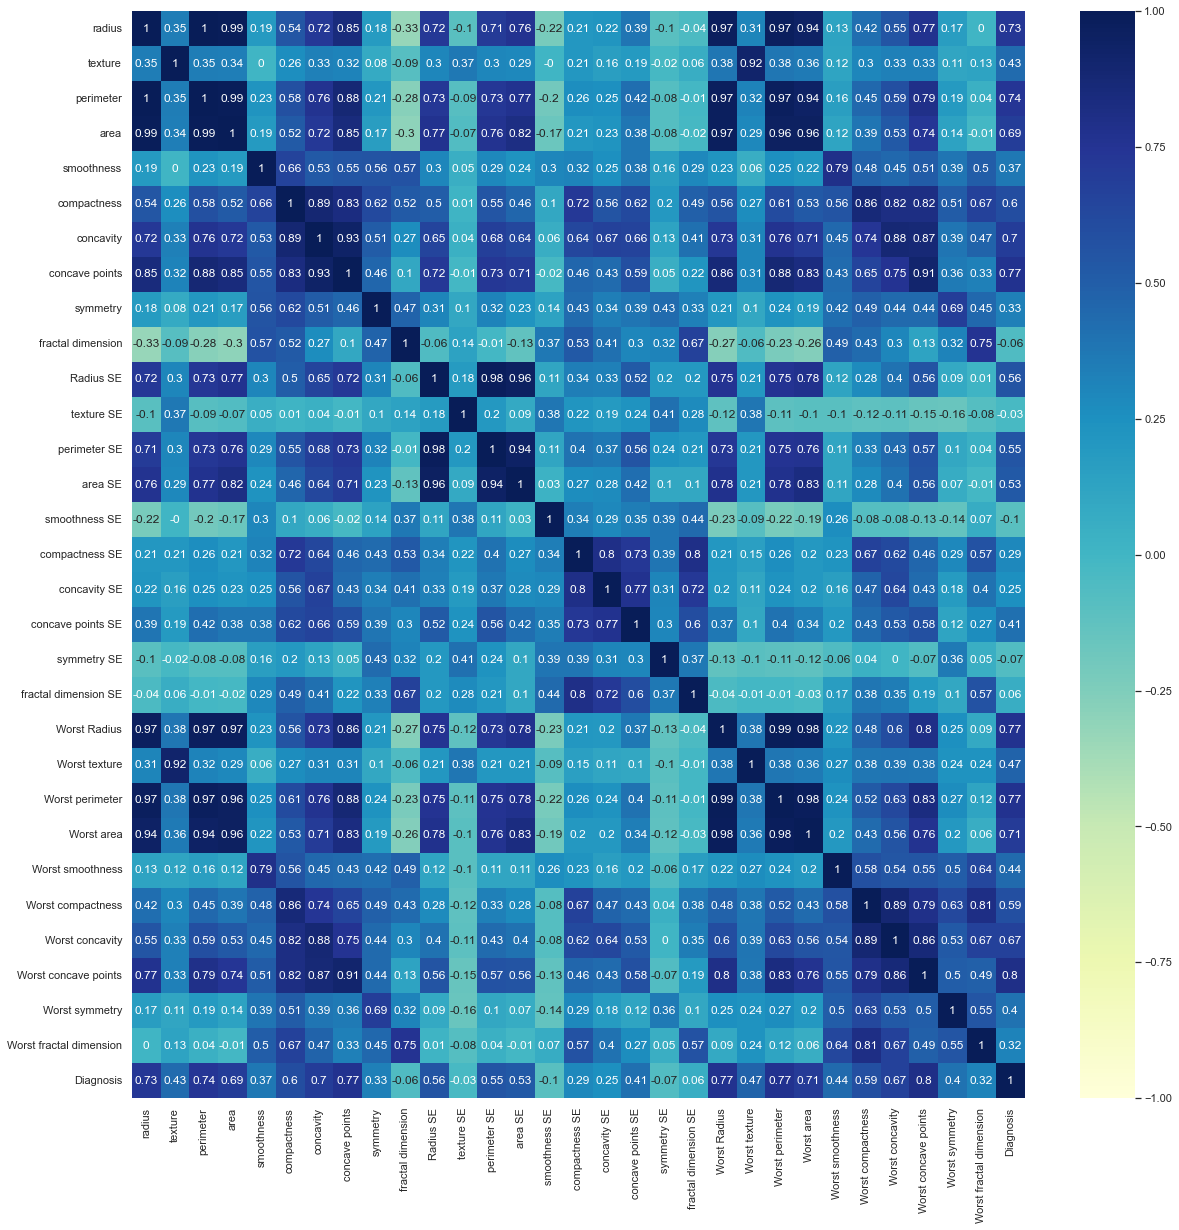

In [108]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data=corr, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

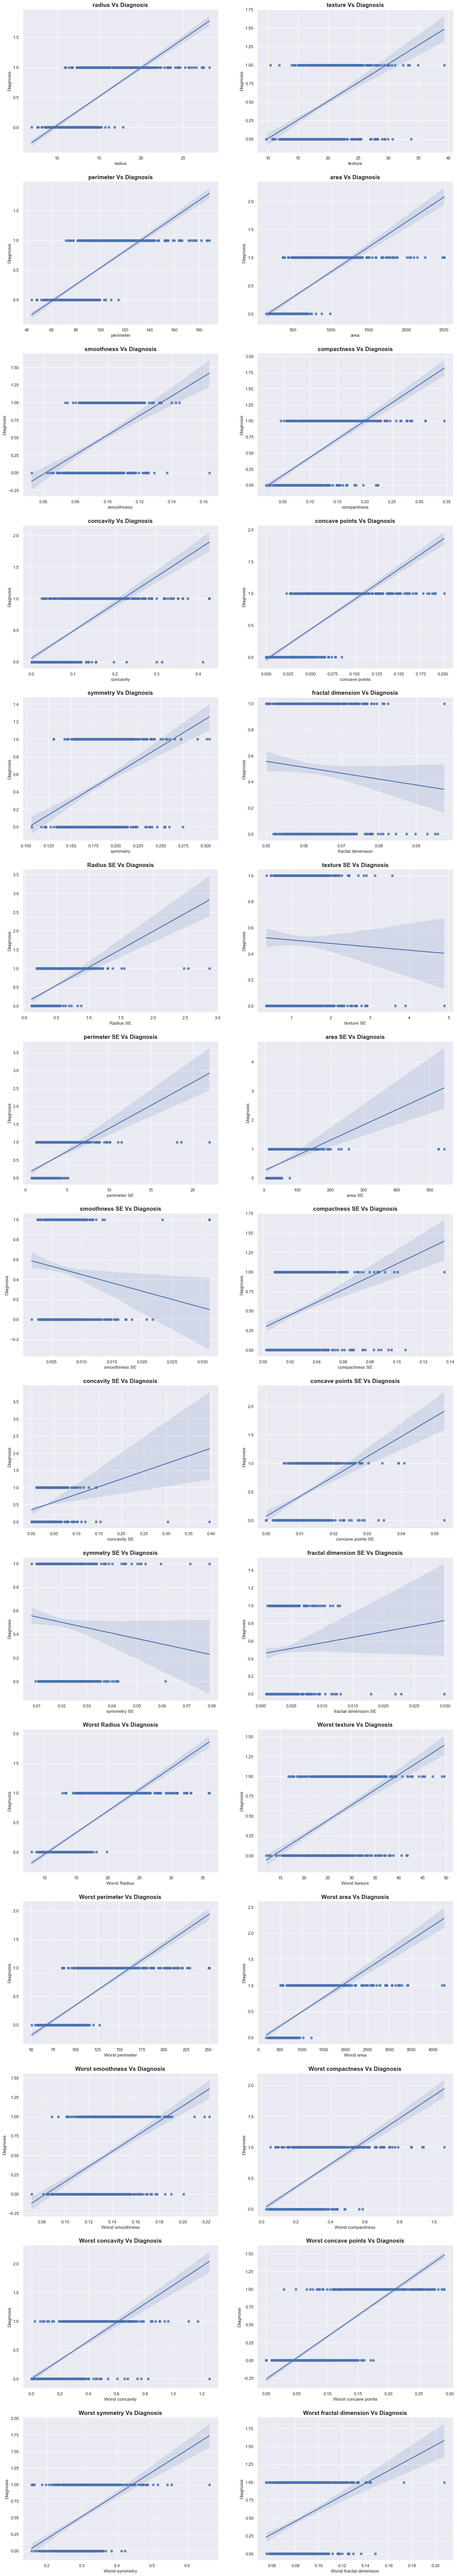

In [109]:
plt.figure(figsize=(20,130))
for feature in enumerate(numerical_feature):
    plt.subplot(16, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=data, x=feature[1], y='Diagnosis')
    plt.xlabel(feature[1])
    plt.ylabel("Diagnosis")
    plt.title("{} Vs Diagnosis".format(feature[1]), fontweight="bold", fontsize=15 )

## <span style='color:red'>5.0  Model Building</span>

### <span style='color:red'>5.1 Getting independent features in dataset(X) and dependent feature in series(y)</span>

In [200]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  Radius SE  texture SE  \
0         0.14710    0.2419            0.07871     1.0950      0.9053   
1         0.07017    0.1812            0.05667     0.5435      0.7339   
2         0.12790    0.2069            0.05999     0.7456      0.7869   
3         0.10520    0.2597            0.09744     0.4956      1.1560   
4         0.10430    0.1809            0.05883     0.7572      0.7813   

   perimeter SE  area SE  smoothness SE  compactness SE  concavity SE  \
0         8.589   153.40       0.006399         0.04904       0.05373   
1         3.398    74.08       0.005225         0.01308       0.01860   
2         4.585    94.03       0.006150         0.04006       0.03832   
3         3.445    27.23       0.009110         0.07458       0.05661   
4         5.438    94.44       0.011490         0.02461       0.05688   

   concave points SE  symmetry SE  fractal dimension SE  Worst Radius  \
0            0.01587      0.03003              0.006193         25.38   
1            0.01340      0.01389              0.003532         24.99   
2            0.02058      0.02250              0.004571         23.57   
3            0.01867      0.05963              0.009208         14.91   
4            0.01885      0.01756              0.005115         22.54   

   Worst texture  Worst perimeter  Worst area  Worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   Worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [201]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

### <span style='color:red '>5.2 Splitting data into Training and Test data</span>

In [202]:
### random state train test split will be same with all people using random_state=19

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
X_train.head()

radius    texture   perimeter        area  smoothness  compactness  \
252  17.350000  23.060000  111.000000  933.100000    0.086620      0.06290   
59    8.598000  20.980000   54.660000  221.800000    0.124300      0.08963   
603  12.750927  24.359779   83.264048  504.184548    0.100301      0.12015   
482  12.470000  17.310000   80.450000  480.100000    0.089280      0.07630   
226   9.567000  15.910000   60.210000  279.600000    0.084640      0.04087   

     concavity  concave points  symmetry  fractal dimension  Radius SE  \
252   0.028910        0.028370  0.156400           0.053070   0.400700   
59    0.030000        0.009259  0.182800           0.067570   0.358200   
603   0.095672        0.049036  0.184547           0.065607   0.300588   
482   0.036090        0.023690  0.152600           0.060460   0.153200   
226   0.016520        0.016670  0.155100           0.064030   0.215200   

     texture SE  perimeter SE    area SE  smoothness SE  compactness SE  \
252    1.317000      2.577000  44.410000       0.005726        0.011060   
59     2.067000      2.493000  18.390000       0.011930        0.031620   
603    1.216522      1.994418  24.562889       0.006252        0.026266   
482    0.781000      1.253000  11.910000       0.003796        0.013710   
226    0.830100      1.215000  12.640000       0.011640        0.010400   

     concavity SE  concave points SE  symmetry SE  fractal dimension SE  \
252      0.012460           0.007671     0.014110              0.001578   
59       0.030000           0.009259     0.033570              0.003048   
603      0.026188           0.010063     0.014993              0.003715   
482      0.013460           0.007096     0.015360              0.001541   
226      0.011860           0.009623     0.023830              0.003540   

     Worst Radius  Worst texture  Worst perimeter   Worst area  \
252     19.850000      31.470000       128.200000  1218.000000   
59       9.565000      27.040000        62.060000   273.900000   
603     15.937154      34.661368       103.581355   754.938369   
482     14.060000      24.340000        92.820000   607.300000   
226     10.510000      19.160000        65.740000   335.900000   

     Worst smoothness  Worst compactness  Worst concavity  \
252          0.124000           0.148600         0.121100   
59           0.163900           0.169800         0.090010   
603          0.164538           0.430894         0.407992   
482          0.127600           0.250600         0.202800   
226          0.150400           0.095150         0.071610   

     Worst concave points  Worst symmetry  Worst fractal dimension  
252              0.082350        0.245200                 0.065150  
59               0.027780        0.297200                 0.077120  
603              0.153227        0.345165                 0.108459  
482              0.105300        0.303500                 0.076610  
226              0.072220        0.275700                 0.081780

In [203]:
y_train.head()

252    1
59     0
603    1
482    0
226    0
Name: Diagnosis, dtype: int64

In [204]:
X_test.head()

radius    texture   perimeter         area  smoothness  compactness  \
38   13.480000  20.820000   88.400000   559.200000    0.101600     0.125500   
62   12.680000  23.840000   82.690000   499.000000    0.112200     0.126200   
421  14.860000  16.940000   94.890000   673.700000    0.089240     0.070740   
73   16.070000  19.650000  104.100000   817.700000    0.091680     0.084240   
566  21.001796  16.487611  138.196133  1351.918328    0.094044     0.131459   

     concavity  concave points  symmetry  fractal dimension  Radius SE  \
38    0.106300        0.054390  0.172000           0.064190    0.21300   
62    0.112800        0.068730  0.190500           0.065900    0.42550   
421   0.033460        0.028770  0.157300           0.057030    0.30280   
73    0.097690        0.066380  0.179800           0.053910    0.74740   
566   0.169556        0.110821  0.195931           0.058522    0.41781   

     texture SE  perimeter SE   area SE  smoothness SE  compactness SE  \
38     0.591400      1.545000  18.52000       0.005367        0.022390   
62     1.178000      2.927000  36.46000       0.007781        0.026480   
421    0.668300      1.612000  23.92000       0.005756        0.016650   
73     1.016000      5.029000  79.25000       0.010820        0.022030   
566    1.119512      2.851583  49.95092       0.004459        0.022797   

     concavity SE  concave points SE  symmetry SE  fractal dimension SE  \
38        0.03049           0.012620     0.013770              0.003187   
62        0.02973           0.012900     0.016350              0.003601   
421       0.01461           0.008281     0.015510              0.002168   
73        0.03500           0.018090     0.015500              0.001948   
566       0.03196           0.013138     0.018326              0.003522   

     Worst Radius  Worst texture  Worst perimeter   Worst area  \
38      15.530000      26.020000       107.300000   740.400000   
62      17.090000      33.470000       111.800000   888.300000   
421     16.310000      20.540000       102.300000   777.500000   
73      19.770000      24.560000       128.800000  1223.000000   
566     22.802591      22.202118       151.521829  1572.124679   

     Worst smoothness  Worst compactness  Worst concavity  \
38           0.161000            0.42250          0.50300   
62           0.185100            0.40610          0.40240   
421          0.121800            0.15500          0.12200   
73           0.150000            0.20450          0.28290   
566          0.115001            0.24435          0.35925   

     Worst concave points  Worst symmetry  Worst fractal dimension  
38               0.225800         0.28070                 0.107100  
62               0.171600         0.33830                 0.103100  
421              0.079710         0.25250                 0.068270  
73               0.152000         0.26500                 0.063870  
566              0.180137         0.28289                 0.078343

In [205]:
y_test.head()

38     1
62     1
421    0
73     1
566    1
Name: Diagnosis, dtype: int64

In [206]:
### both will have same shape
X_train.shape, y_train.shape

((522, 30), (522,))

In [207]:
### both will have same shape
X_test.shape, y_test.shape

((174, 30), (174,))

### <span style='color:red '>5.3 Standardisation/ Feature scaling the dataset</span>

In [208]:
### Creating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [209]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.67615976,  0.76532905,  0.549982  , ..., -0.6730936 ,
        -0.81722521, -1.09316026],
       [-1.6685983 ,  0.28161311, -1.63911544, ..., -1.47922151,
         0.0079284 , -0.45333678],
       [-0.55598289,  1.06760008, -0.52770172, ...,  0.37393288,
         0.76906055,  1.2218211 ],
       ...,
       [ 1.5040051 ,  0.46765771,  1.43587872, ...,  0.71772449,
        -0.56809229, -0.9755653 ],
       [-0.5437836 ,  1.00317069, -0.51859961, ...,  0.38592725,
         0.81067316,  1.15050375],
       [ 1.49134136, -0.42239671,  1.47752005, ...,  0.50079414,
        -0.18162582, -0.86565908]])

In [210]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[-0.36065625,  0.2444042 , -0.3281437 , ...,  1.44600204,
        -0.25389919,  1.1491618 ],
       [-0.57498514,  0.94672253, -0.55000644, ...,  0.6453399 ,
         0.66011711,  0.93535278],
       [ 0.00906109, -0.65791207, -0.07597398, ..., -0.71209264,
        -0.70138633, -0.92638923],
       ...,
       [ 1.26020599,  2.95367856,  1.21051903, ...,  0.51091139,
        -0.40306157, -0.53030802],
       [-0.0348711 ,  0.81194614, -0.01945387, ...,  0.31872972,
        -0.47106213, -0.55342311],
       [ 0.3493082 ,  0.21184639,  0.43730215, ...,  1.17271331,
         1.17266445,  1.5286728 ]])

## <span style='color:red '>6.0 Model</span>

In [211]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val):
    """
    The function takes actual value and predicted value as argument 
    and returns Accuracy, Precision, Recall, F-1 Score rounded to 
    3 decimal places.
    """
    acc=round(accuracy_score(actual_val, pred_val),5)
    prec=round(precision_score(actual_val, pred_val),5)
    rec=round(recall_score(actual_val, pred_val),5) 
    f1=round(2*prec*rec/(prec+rec),5)
    roc_auc=round(roc_auc_score(actual_val, pred_val),5)
    return acc, prec, rec, f1, roc_auc

### creating dictionary containing model objects for different algorithmn
models={
    "Logistic Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Bagging Classifier": BaggingClassifier(base_estimator=LogisticRegression()),
    "Extra Tree Classifier": ExtraTreesClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoost Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier()
}



### Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and 
    X test data as argument, trains model and gives prediction for train data 
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

In [212]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.99234
Precision Score: 0.99611
Recall Score: 0.98842
f1 Score: 0.99225
Roc_Auc Score: 0.99231
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.96552
Precision Score: 0.96629
Recall Score: 0.96629
f1 Score: 0.96629
Roc_Auc Score: 0.9655
**************************************************


Support Vector Classifier Model

Model Performance for training dataset
Accuracy score: 0.99425
Precision Score: 1.0
Recall Score: 0.98842
f1 Score: 0.99418
Roc_Auc Score: 0.99421
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.96552
Precision Score: 0.96629
Recall Score: 0.96629
f1 Score: 0.96629
Roc_Auc Score: 0.9655
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 1.0
Precision Score: 1.0
Recall Score: 1.0
f1 Score: 1.

In [213]:
### Tabulating model performance in dataframe
### Sorting the model based on Recall as this is a health related problem statement
### So our main objective is to reduce False Negatives which may lead to serious medical complications.
### False Negative => The person has cancer but model prediction is Negative(No Cancer).
model_perf=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Recall'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

Model  Accuracy  Precision   Recall  F1 Score  \
0   Decision Tree Classifier   0.91954    0.87879  0.97753   0.92553   
1      Extra Tree Classifier   0.98276    0.98864  0.97753   0.98305   
2   GradientBoost Classifier   0.98851    1.00000  0.97753   0.98864   
3        Logistic Regression   0.96552    0.96629  0.96629   0.96629   
4  Support Vector Classifier   0.96552    0.96629  0.96629   0.96629   
5         Bagging Classifier   0.96552    0.96629  0.96629   0.96629   
6         XGBoost Classifier   0.97701    0.98851  0.96629   0.97727   
7   Random Forest Classifier   0.96552    0.97701  0.95506   0.96591   
8        AdaBoost Classifier   0.96552    0.97701  0.95506   0.96591   

   Roc_Auc Score  
0        0.91818  
1        0.98288  
2        0.98876  
3        0.96550  
4        0.96550  
5        0.96550  
6        0.97726  
7        0.96576  
8        0.96576

### <span style='color:blue'>Observation</span>
1. Since first three models have same recall, so lets select model with highest accuracy. Selecting Gradient Boosting Classifier.

In [199]:
gbc=GradientBoostingClassifier()
gbc

GradientBoostingClassifier()

In [159]:
### Passing independant and dependant training data to the model
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [160]:
gbc_pred=gbc.predict(X_test)
gbc_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [161]:
confusion_mat=confusion_matrix(y_test, gbc_pred)
confusion_mat

array([[85,  0],
       [ 3, 86]], dtype=int64)

In [162]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, gbc_pred),5)
accuracy

0.98276

In [163]:
precision= round(precision_score(y_test, gbc_pred),5)
precision

1.0

In [164]:
recall= round(recall_score(y_test, gbc_pred),5)
recall

0.96629

In [165]:
f1_score=round(2*precision*recall/(precision+recall),5)
f1_score

0.98286

In [166]:
roc_auc= round(roc_auc_score(y_test, gbc_pred),5)
roc_auc

0.98315

## <span style='color:red '>7.0 Saving the Model</span>

In [195]:
### Writing model to a file that will be used while deployment
with open('model_batch.sav','wb') as f:
    pickle.dump(gbc,f)

In [196]:
### Writing model to a file that will be used while deployment
with open('scalar_batch.sav','wb') as f:
    pickle.dump(scaler,f)

## <span style='color:red '>8.0 For Deployment prediction through Web Application</span>

In [256]:
### Creating copy of dataset with first 10 features
data1=data[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave points', 'symmetry', 'fractal dimension','Diagnosis']].copy()
data1.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  Diagnosis  
0         0.14710    0.2419            0.07871          1  
1         0.07017    0.1812            0.05667          1  
2         0.12790    0.2069            0.05999          1  
3         0.10520    0.2597            0.09744          1  
4         0.10430    0.1809            0.05883          1

In [257]:
X1=data1.iloc[:,:-1]
y1=data1.iloc[:,-1]
X1.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  
0         0.14710    0.2419            0.07871  
1         0.07017    0.1812            0.05667  
2         0.12790    0.2069            0.05999  
3         0.10520    0.2597            0.09744  
4         0.10430    0.1809            0.05883

In [258]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [259]:
### random state train test split will be same with all people using random_state=19

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=19)
X_train1.head()

radius    texture   perimeter        area  smoothness  compactness  \
252  17.350000  23.060000  111.000000  933.100000    0.086620      0.06290   
59    8.598000  20.980000   54.660000  221.800000    0.124300      0.08963   
603  12.750927  24.359779   83.264048  504.184548    0.100301      0.12015   
482  12.470000  17.310000   80.450000  480.100000    0.089280      0.07630   
226   9.567000  15.910000   60.210000  279.600000    0.084640      0.04087   

     concavity  concave points  symmetry  fractal dimension  
252   0.028910        0.028370  0.156400           0.053070  
59    0.030000        0.009259  0.182800           0.067570  
603   0.095672        0.049036  0.184547           0.065607  
482   0.036090        0.023690  0.152600           0.060460  
226   0.016520        0.016670  0.155100           0.064030

In [260]:
y_train1.head()

252    1
59     0
603    1
482    0
226    0
Name: Diagnosis, dtype: int64

In [261]:
X_test1.head()

radius    texture   perimeter         area  smoothness  compactness  \
38   13.480000  20.820000   88.400000   559.200000    0.101600     0.125500   
62   12.680000  23.840000   82.690000   499.000000    0.112200     0.126200   
421  14.860000  16.940000   94.890000   673.700000    0.089240     0.070740   
73   16.070000  19.650000  104.100000   817.700000    0.091680     0.084240   
566  21.001796  16.487611  138.196133  1351.918328    0.094044     0.131459   

     concavity  concave points  symmetry  fractal dimension  
38    0.106300        0.054390  0.172000           0.064190  
62    0.112800        0.068730  0.190500           0.065900  
421   0.033460        0.028770  0.157300           0.057030  
73    0.097690        0.066380  0.179800           0.053910  
566   0.169556        0.110821  0.195931           0.058522

In [262]:
y_test1.head()

38     1
62     1
421    0
73     1
566    1
Name: Diagnosis, dtype: int64

In [263]:
### Creating a standard scaler object
scaler1=StandardScaler()
scaler1

StandardScaler()

In [264]:
### using fit_transform to Standardize the train data
X_train1=scaler1.fit_transform(X_train1)
X_train1

array([[ 0.67615976,  0.76532905,  0.549982  , ..., -0.69824389,
        -1.00573674, -1.40214066],
       [-1.6685983 ,  0.28161311, -1.63911544, ..., -1.16909172,
        -0.01045398,  0.71187224],
       [-0.55598289,  1.06760008, -0.52770172, ..., -0.18908117,
         0.05539536,  0.42572104],
       ...,
       [ 1.5040051 ,  0.46765771,  1.43587872, ...,  0.52082106,
        -0.80215617, -1.03765568],
       [-0.5437836 ,  1.00317069, -0.51859961, ..., -0.17975482,
         0.01465035,  0.36493291],
       [ 1.49134136, -0.42239671,  1.47752005, ...,  1.13311179,
         0.68605894, -0.94845765]])

In [265]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test1=scaler1.transform(X_test1)
X_test1

array([[-0.36065625,  0.2444042 , -0.3281437 , ..., -0.05717538,
        -0.41761511,  0.21908854],
       [-0.57498514,  0.94672253, -0.55000644, ...,  0.29612679,
         0.27983682,  0.46839627],
       [ 0.00906109, -0.65791207, -0.07597398, ..., -0.68838888,
        -0.97180664, -0.82479645],
       ...,
       [ 1.26020599,  2.95367856,  1.21051903, ...,  0.23798222,
        -1.51845816, -1.39339302],
       [-0.0348711 ,  0.81194614, -0.01945387, ...,  0.2296268 ,
        -0.61507447, -0.56696226],
       [ 0.3493082 ,  0.21184639,  0.43730215, ...,  1.13552741,
         1.25626953,  1.58517826]])

In [266]:
### again Checking best model as we have reduced features for web Application.

In [269]:
### Creating empty list to store model names
model_list1=[]
### creating empty list to store accuracy score for each model
acc_score_list1=[]
### creating empty list for storing precision score
prec_score_list1=[]
### creating list to store recall score
recall_list1=[]
### creating list to store f1_score score
f1_score_list1=[]
### creating list to store roc_auc score
roc_auc_list1=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred1, pred_val1=model_trainer(model,X_train1, y_train1, X_test1)
    
    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train1,y_pred1 )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test1,pred_val1)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    
    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list1.append(list(models.keys())[num])
    acc_score_list1.append(acc_score)
    prec_score_list1.append(prec_score)
    recall_list1.append(rec_score)
    f1_score_list1.append(f1_score)
    roc_auc_list1.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.95019
Precision Score: 0.95686
Recall Score: 0.94208
f1 Score: 0.94941
Roc_Auc Score: 0.95013
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.94253
Precision Score: 0.95402
Recall Score: 0.93258
f1 Score: 0.94318
Roc_Auc Score: 0.94276
**************************************************


Support Vector Classifier Model

Model Performance for training dataset
Accuracy score: 0.97126
Precision Score: 0.97287
Recall Score: 0.96911
f1 Score: 0.97099
Roc_Auc Score: 0.97125
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.94828
Precision Score: 0.95455
Recall Score: 0.94382
f1 Score: 0.94915
Roc_Auc Score: 0.94838
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 1.0
Precision Score: 1.0
Recall Score: 1.0
f1 Sco

In [270]:
### Tabulating model performance in dataframe
### Sorting the model based on Recall as this is a health related problem statement
### So our main objective is to reduce False Negatives which may lead to serious medical complications.
### False Negative => The person has cancer but model prediction is Negative(No Cancer).
model_perf1=pd.DataFrame(list(zip(model_list1, acc_score_list1,prec_score_list1, recall_list1,f1_score_list1, roc_auc_list1)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Recall'], ascending=False,).reset_index()
model_perf1.drop('index', axis=1, inplace=True)
model_perf1

Model  Accuracy  Precision   Recall  F1 Score  \
0      Extra Tree Classifier   0.96552    0.97701  0.95506   0.96591   
1  Support Vector Classifier   0.94828    0.95455  0.94382   0.94915   
2   Decision Tree Classifier   0.93103    0.92308  0.94382   0.93333   
3   Random Forest Classifier   0.95977    0.97674  0.94382   0.96000   
4        AdaBoost Classifier   0.95977    0.97674  0.94382   0.96000   
5        Logistic Regression   0.94253    0.95402  0.93258   0.94318   
6         Bagging Classifier   0.93678    0.94318  0.93258   0.93785   
7   GradientBoost Classifier   0.95402    0.97647  0.93258   0.95402   
8         XGBoost Classifier   0.95977    0.98810  0.93258   0.95954   

   Roc_Auc Score  
0        0.96576  
1        0.94838  
2        0.93073  
3        0.96015  
4        0.96015  
5        0.94276  
6        0.93688  
7        0.95453  
8        0.96041

In [271]:
etc=ExtraTreesClassifier()
etc

ExtraTreesClassifier()

In [272]:
### Passing independant and dependant training data to the model
etc.fit(X_train1,y_train1)

ExtraTreesClassifier()

In [273]:
etc_pred=etc.predict(X_test1)
etc_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [274]:
confusion_mat1=confusion_matrix(y_test1, etc_pred)
confusion_mat1

array([[85,  0],
       [ 6, 83]], dtype=int64)

In [275]:
### accuracy using accuracy_score
accuracy1=round(accuracy_score(y_test1, etc_pred),5)
accuracy1

0.96552

In [276]:
precision1= round(precision_score(y_test1, etc_pred),5)
precision1

1.0

In [277]:
recall1= round(recall_score(y_test1, etc_pred),5)
recall1

0.93258

In [278]:
f1_score=round(2*precision1*recall1/(precision1+recall1),5)
f1_score

0.96511

In [279]:
roc_auc1= round(roc_auc_score(y_test1, etc_pred),5)
roc_auc1

0.96629

In [280]:
### Writing model to a file that will be used while deployment
with open('model_web.sav','wb') as f:
    pickle.dump(etc,f)

In [281]:
### Writing model to a file that will be used while deployment
with open('scalar_web.sav','wb') as f:
    pickle.dump(scaler1,f)